# AIN 214 PA3 on Data Prepocessing and Regression

# THE STUDENT INFO
## Student Name: Emirhan Utku
## Student ID: 2210765029


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder


# Load the dataset
# Replace 'path_to_dataset' with the actual file path
path_to_dataset = 'housing.csv'
housing_df = pd.read_csv(path_to_dataset)

# We will deal with the famous California Housing Prices dataset from Kaggle. [1]

# 1. Data Preprocessing (50 Pts)

## 1.1. Explaratory Data Analysis (10 Pts)

* Check for missing values
* Visualize the features with any relevant plots to understand the distribution of data
* Visualize the target variable with respect to the features 
* Visualize the correlation between the features using a heatmap
* Comment on any findings

In [2]:
#Check for missing values
missing_values = housing_df.isnull().sum()
print(missing_values)



columns_with_missing_values = housing_df.columns[housing_df.isnull().any()]


housing_df.dropna(subset=columns_with_missing_values, inplace=True)


print("\nAfter Dropping Rows with Missing Values")
print(housing_df.isnull().sum())



longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

After Dropping Rows with Missing Values
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


### We see that the total_bedroom variable is empty in 207 data items.

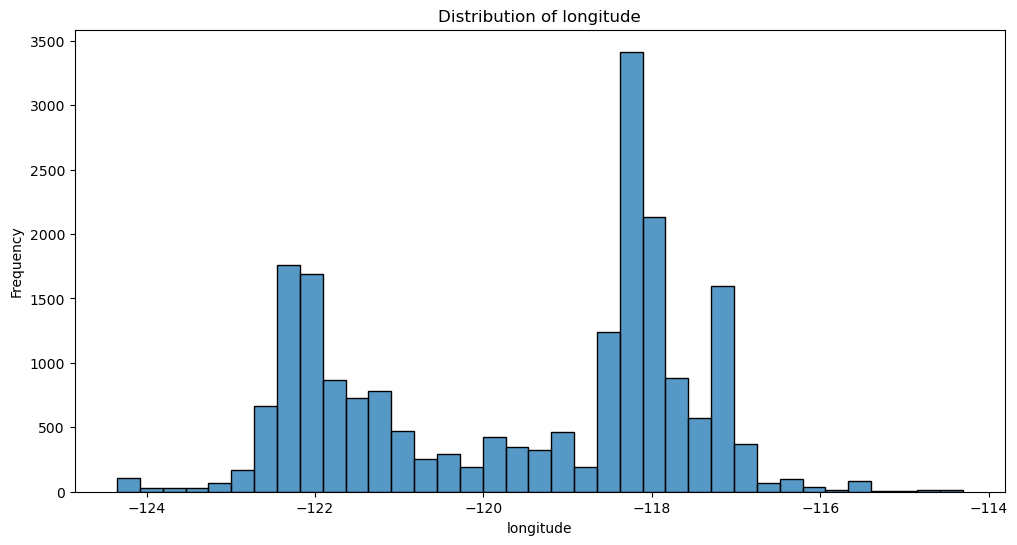

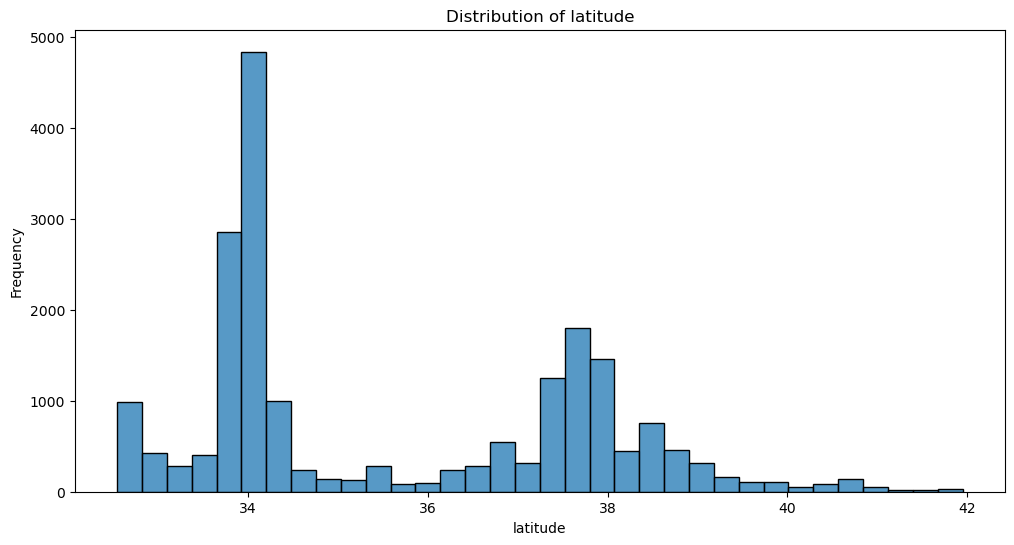

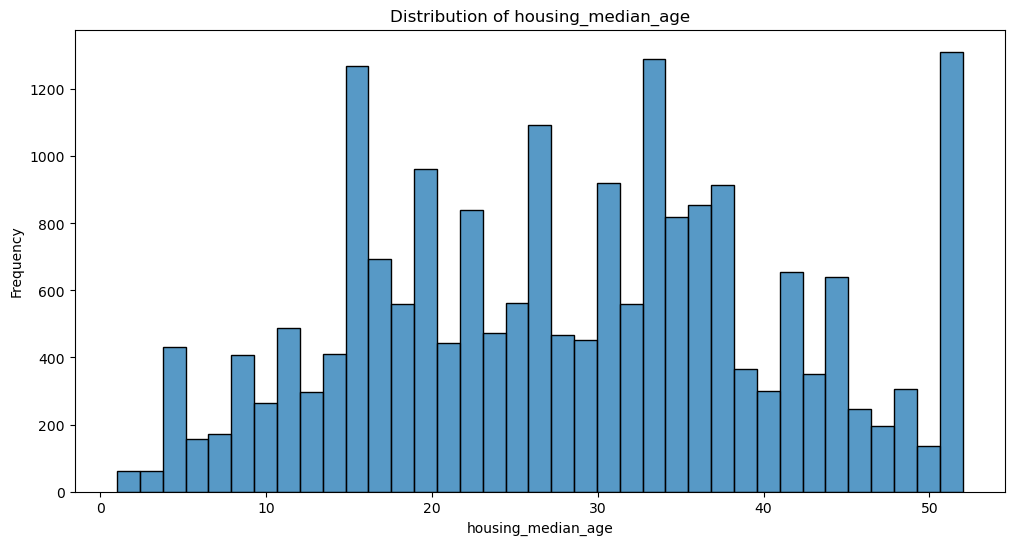

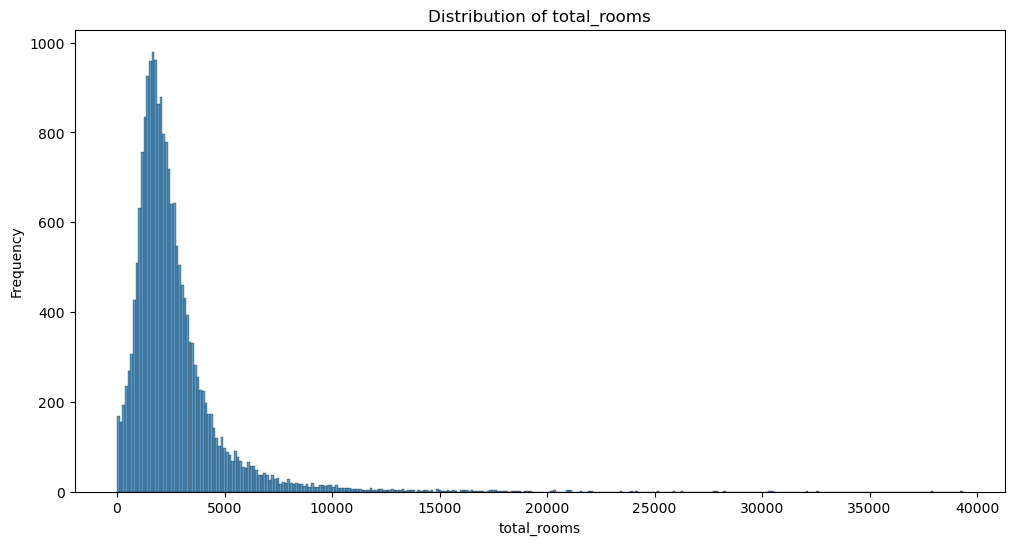

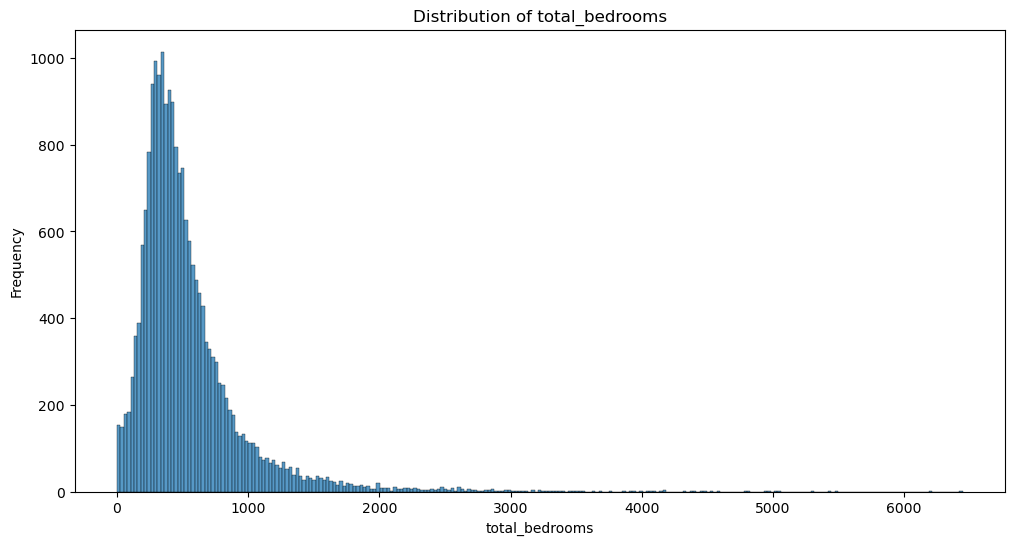

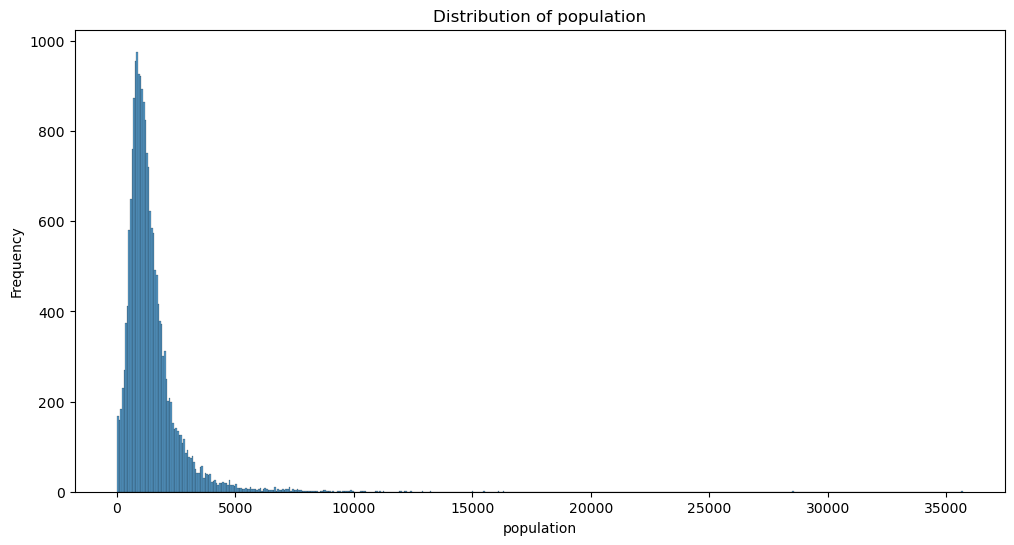

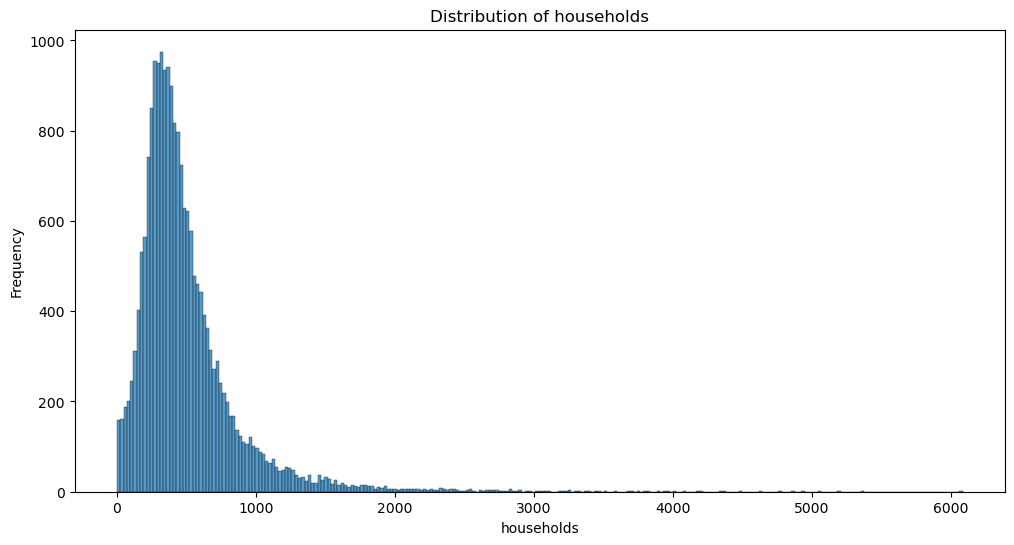

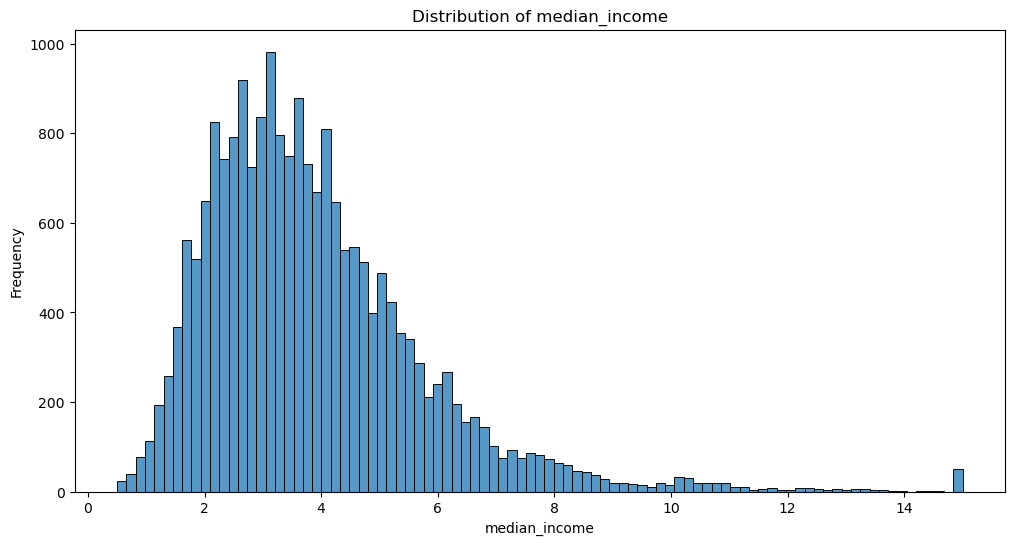

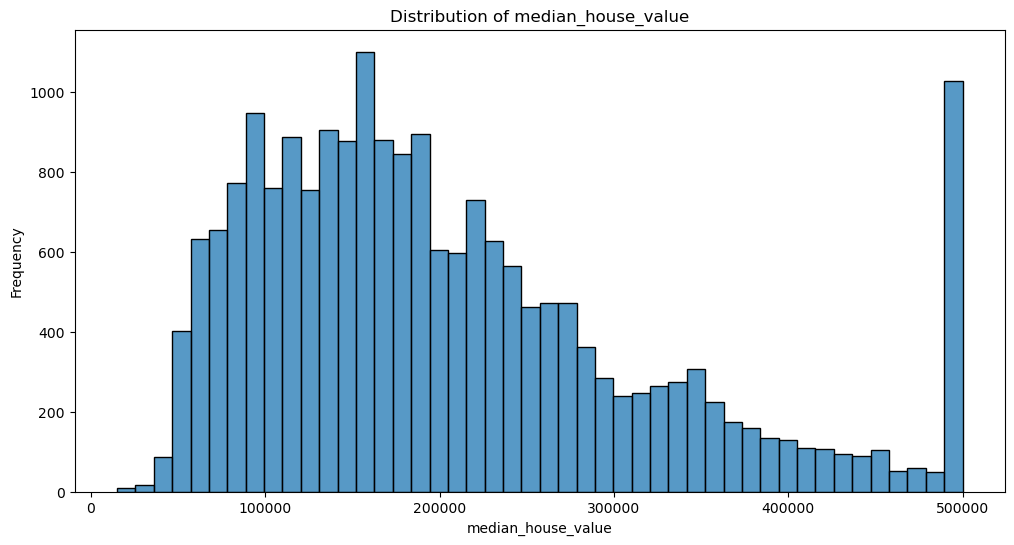

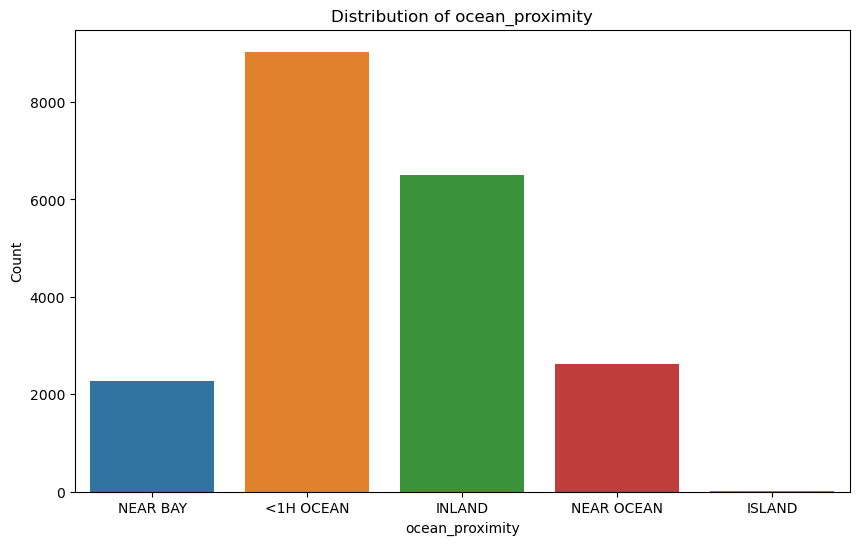

In [3]:
#Visualize the features with any relevant plots to understand the distribution of data


numeric_features = ['longitude','latitude','housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
categoric_features=['ocean_proximity']

for feature in numeric_features:
    plt.figure(figsize=(12, 6))
    sns.histplot(housing_df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
    







for feature in categoric_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=housing_df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
    
    

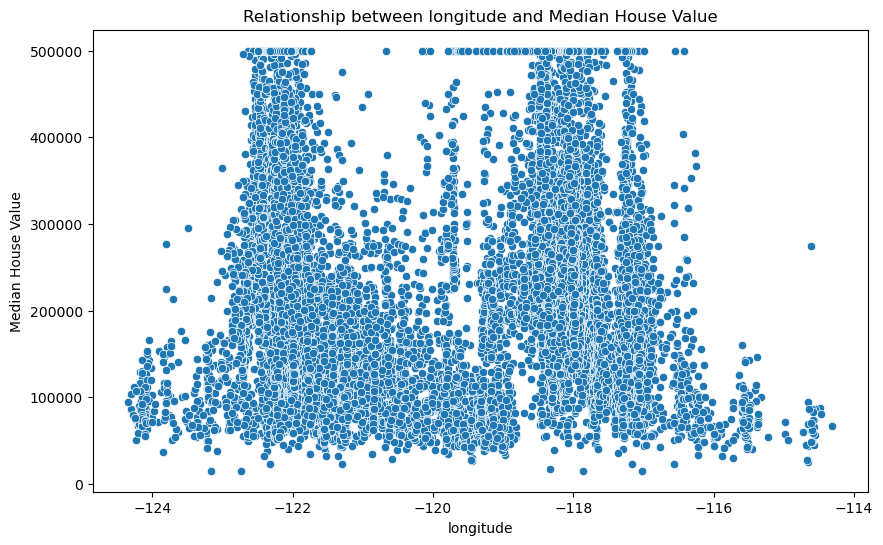

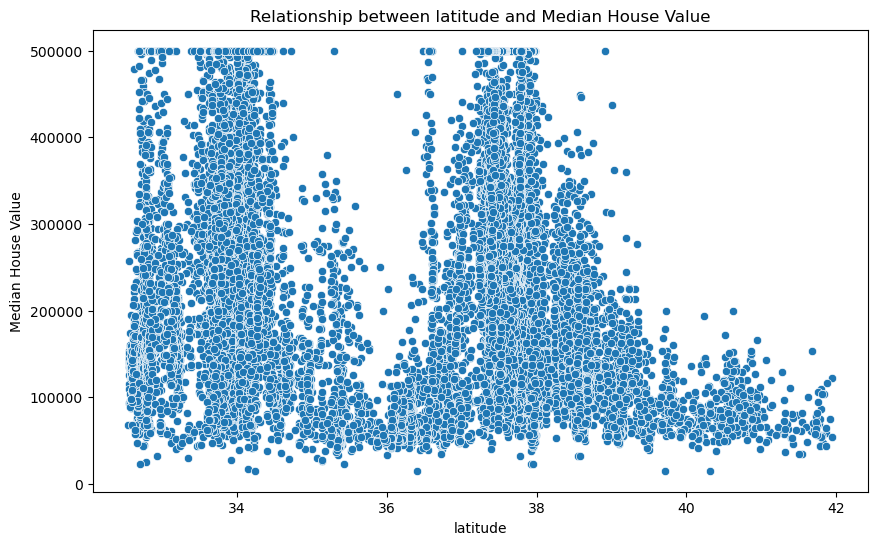

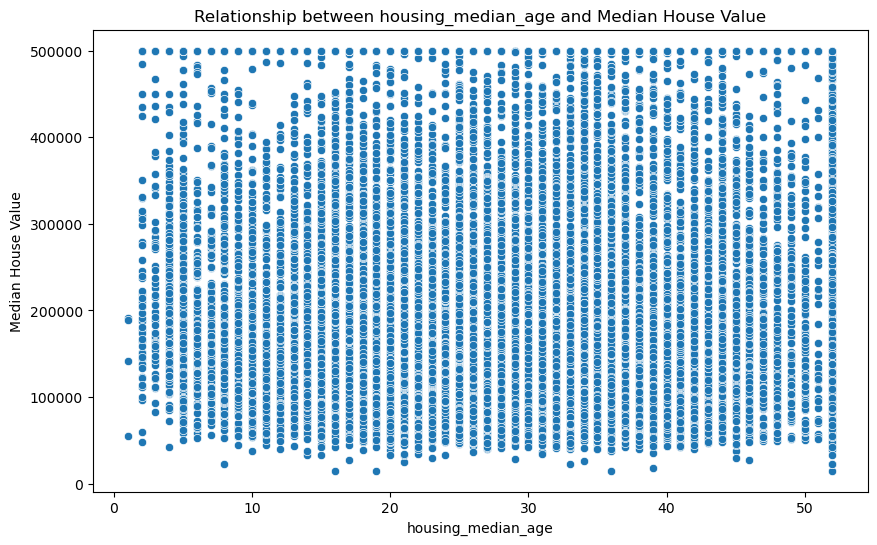

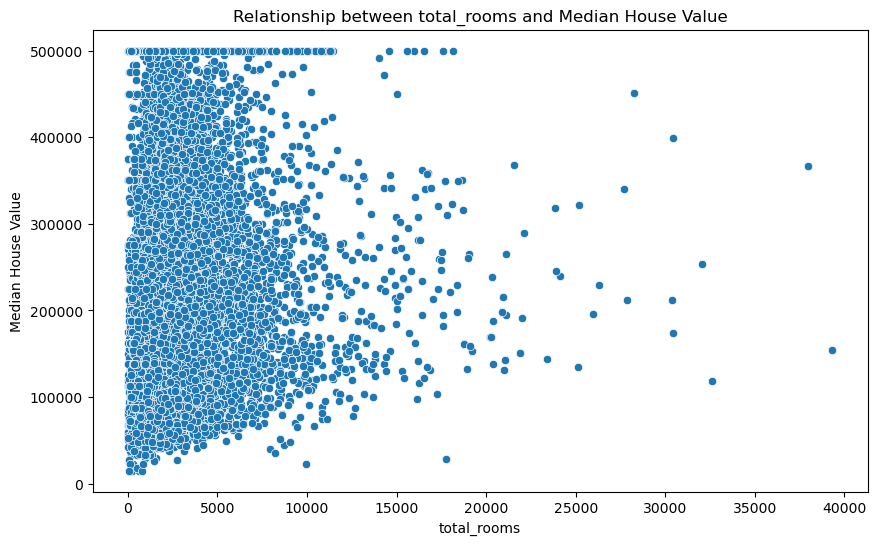

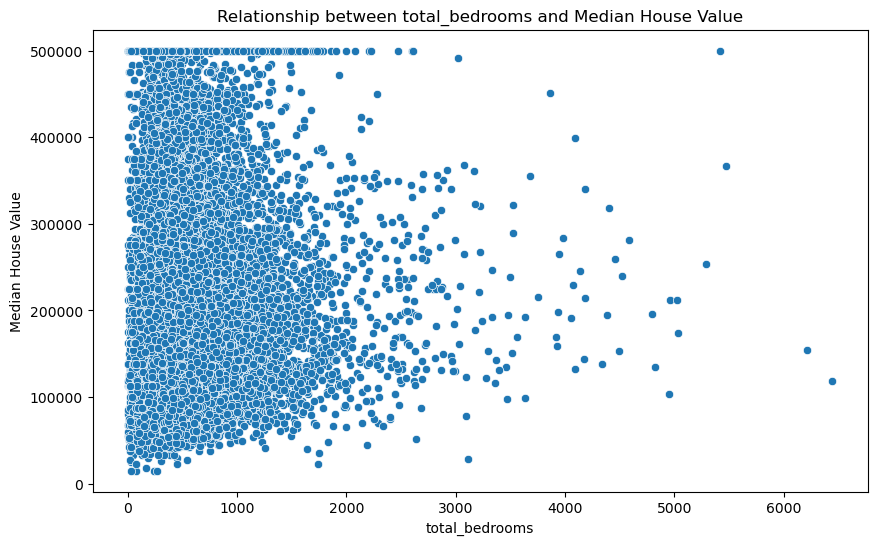

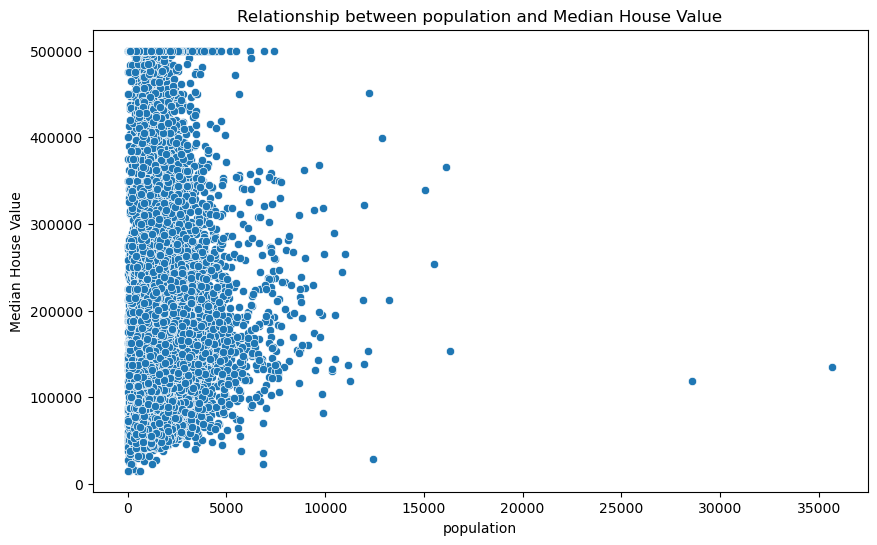

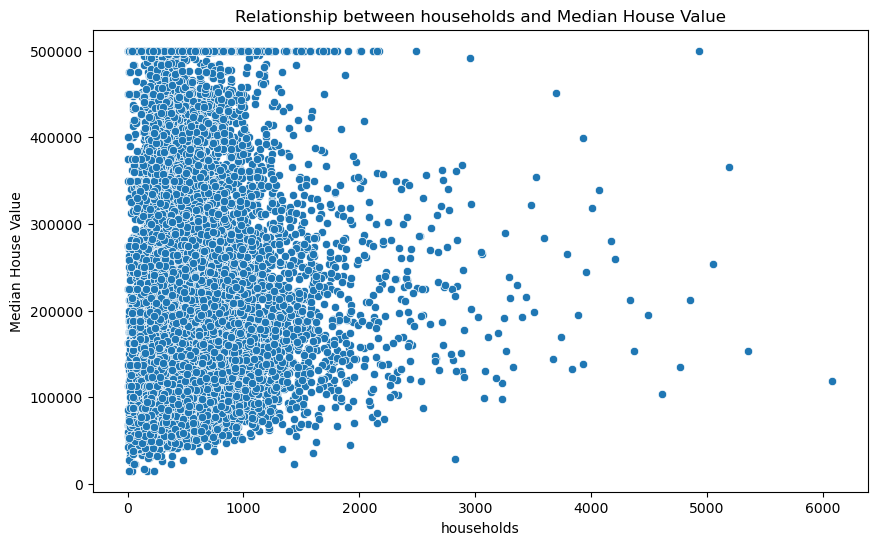

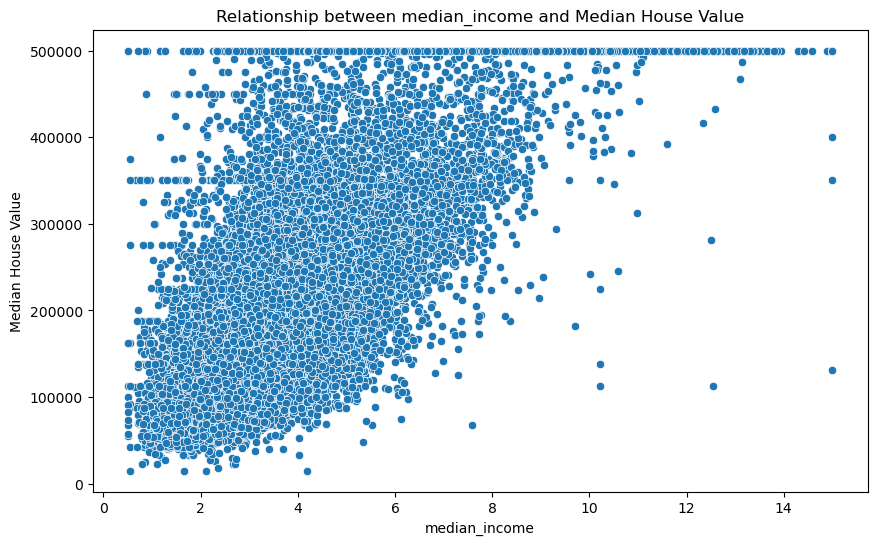

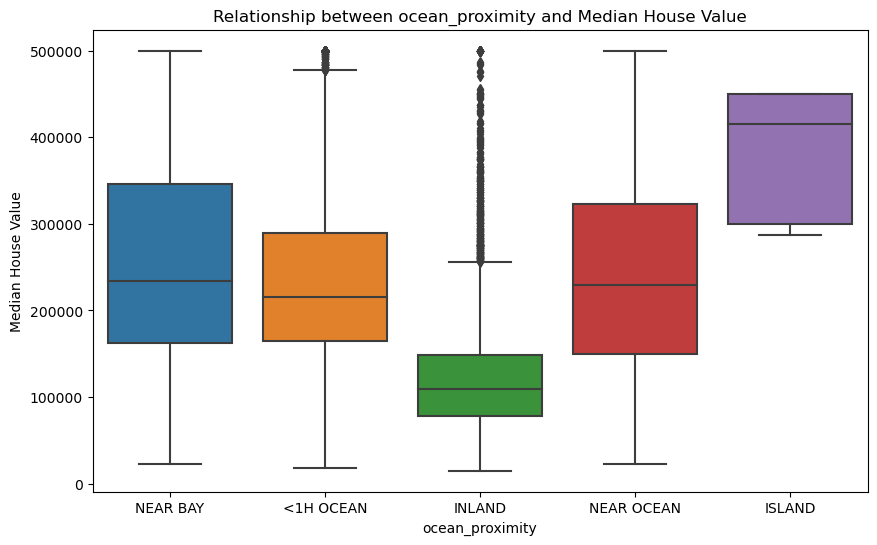

In [4]:
#Visualize the target variable with respect to the features


for feature in numeric_features:
    if feature=='median_house_value':
        continue
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='median_house_value', data=housing_df)
    plt.title(f'Relationship between {feature} and Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.show()
    

for feature in categoric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='median_house_value', data=housing_df)
    plt.title(f'Relationship between {feature} and Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.show()
    



### It is observed that there are outliers in numerical variables other than housing_median_age.

### It is observed that some values of median_house_value in the categorical variables '<1H OCEAN' and 'INLAND' are outside the limits



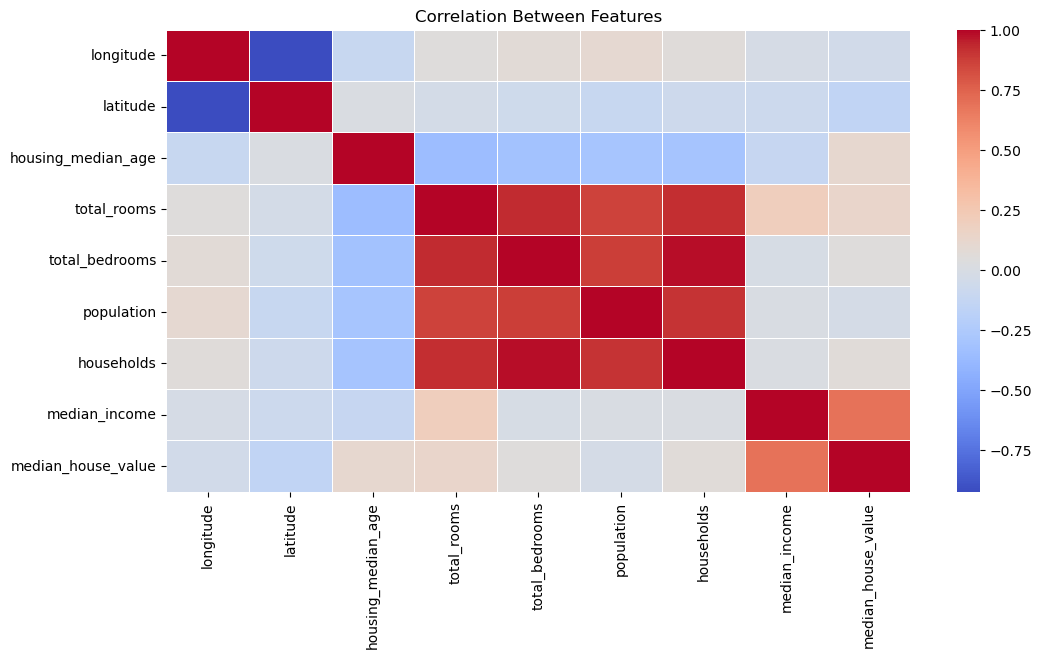

In [5]:
#Visualize the correlation between the features using a heatmap

correlation_matrix = housing_df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Features')
plt.show()

### It is clearly seen in the heatmap that there is a positive relationship (an increasing trend) between the variables total_rooms, total_bedrooms, population and households.

## 1.2. Outlier Detection (15 Pts)
* Choose an outlier detection method and apply it to the data.
* Explain your method and why you choose it.

In [6]:
# Function to create a checkpoint
def checkpoint(dataframe, filename):
    dataframe.to_csv(f"{filename}.csv", index=False)
    print(f"Checkpoint '{filename}' created.")

In [23]:
checkpoint(housing_df,'originalData')

Checkpoint 'originalData' created.


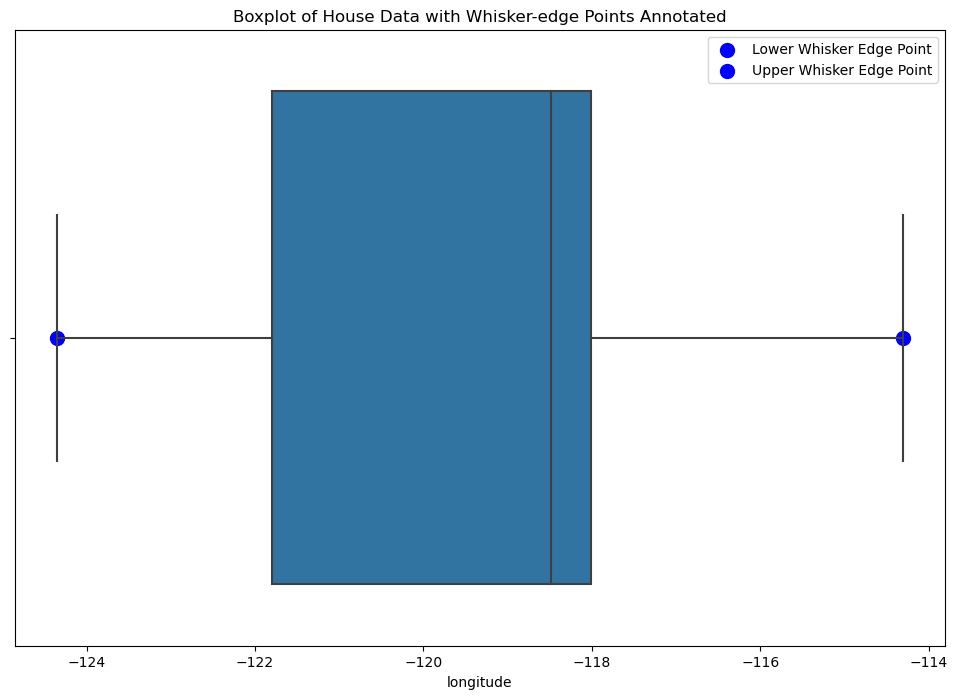

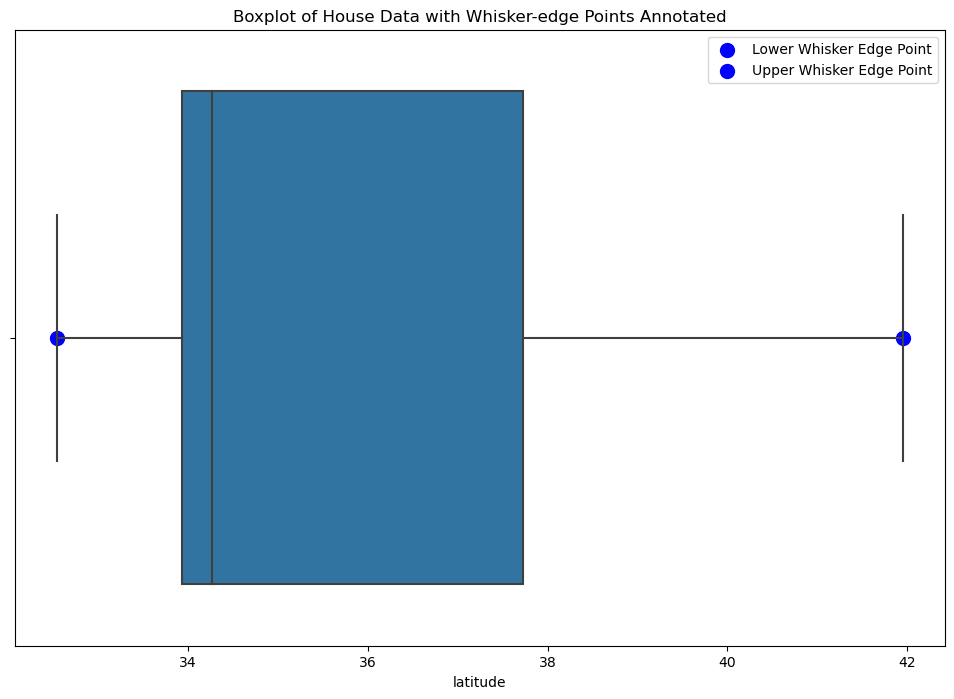

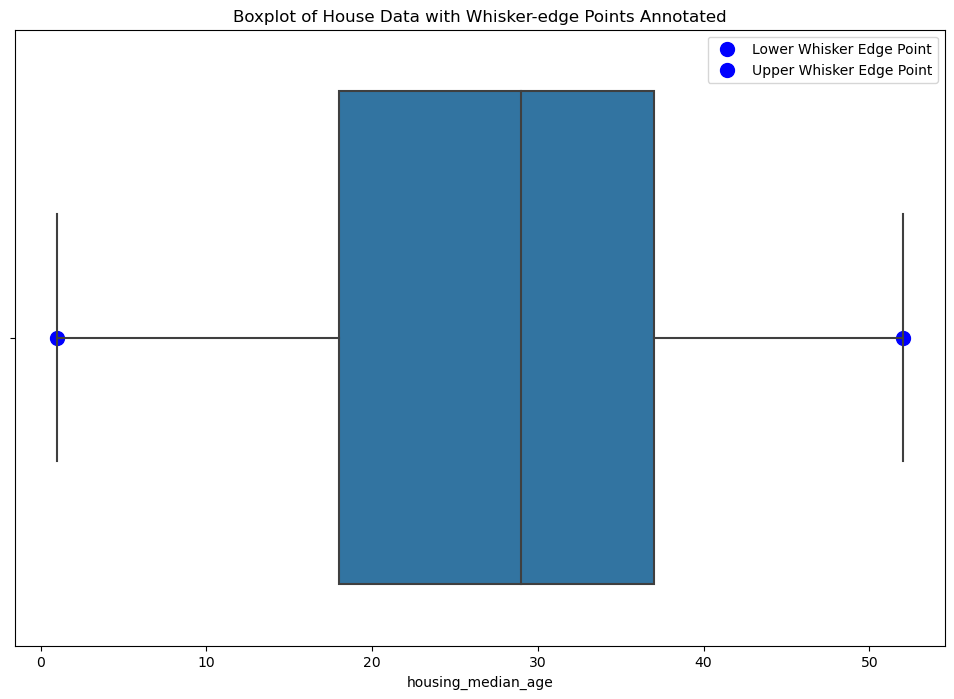

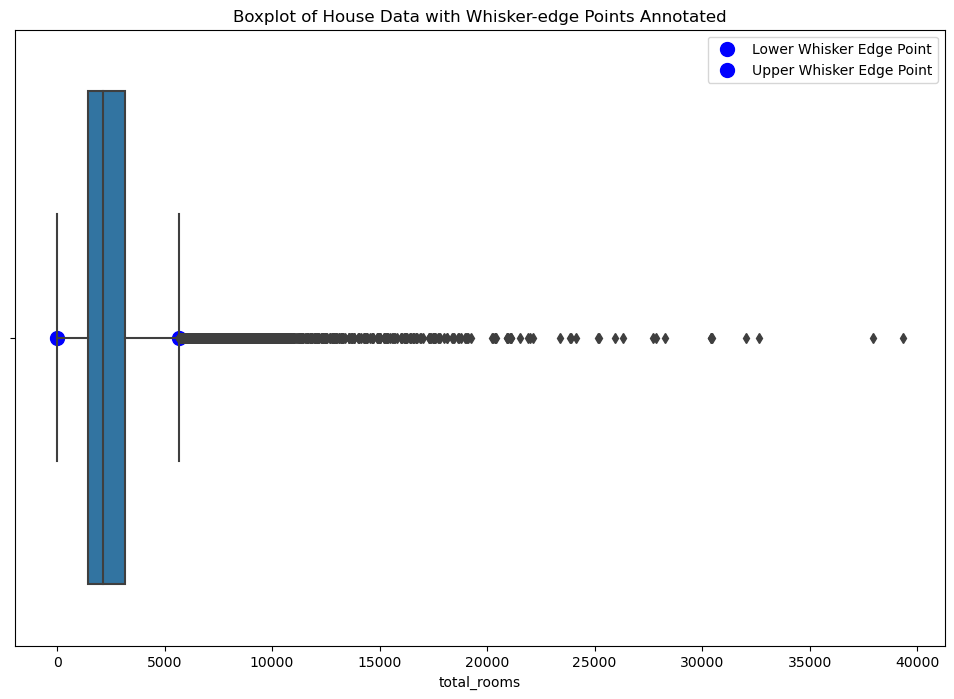

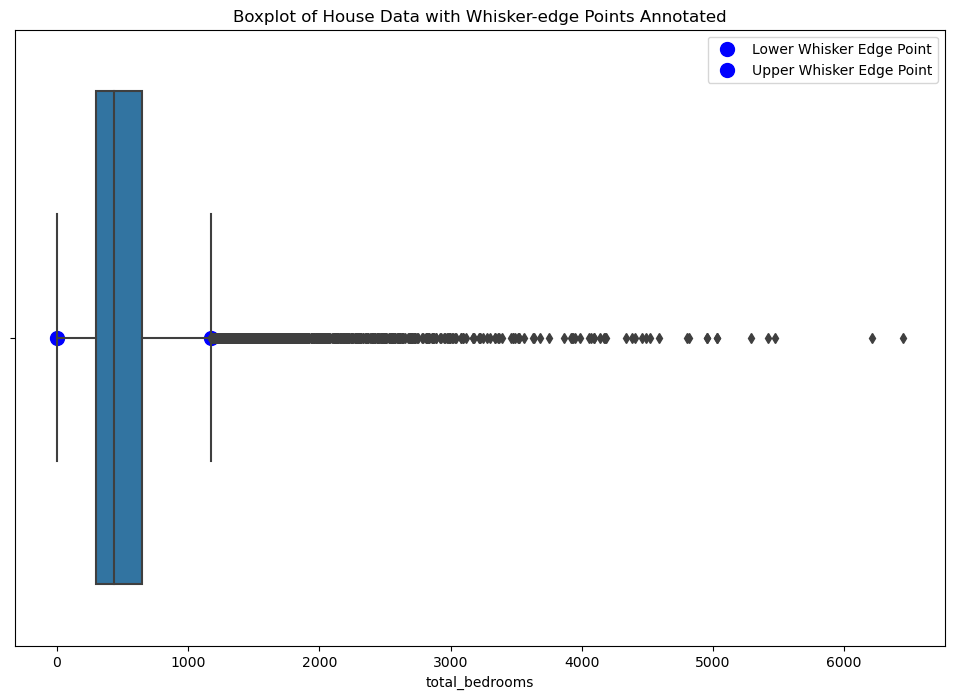

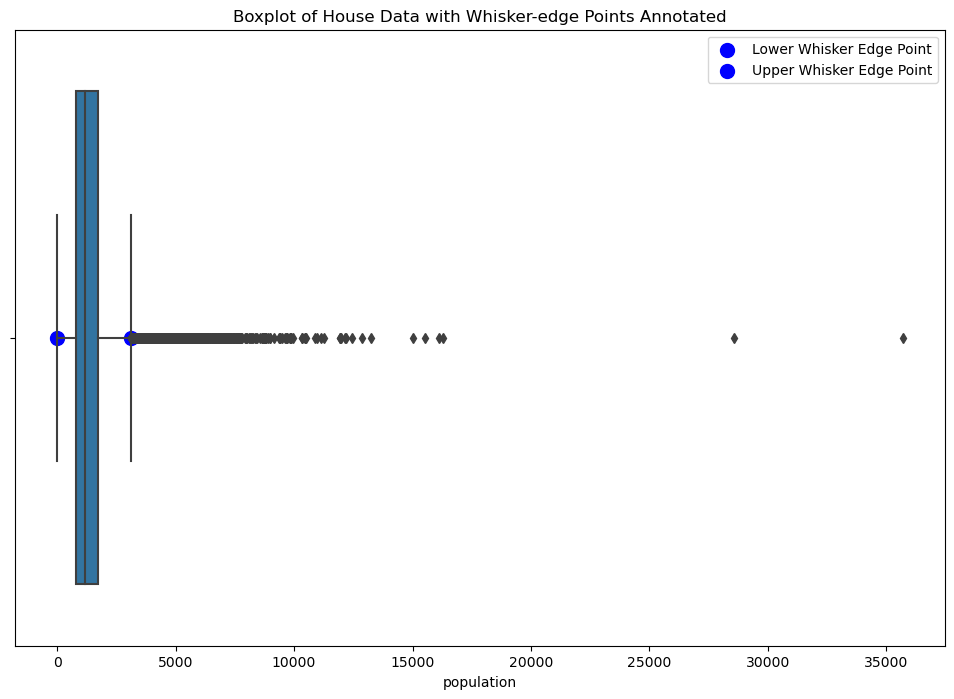

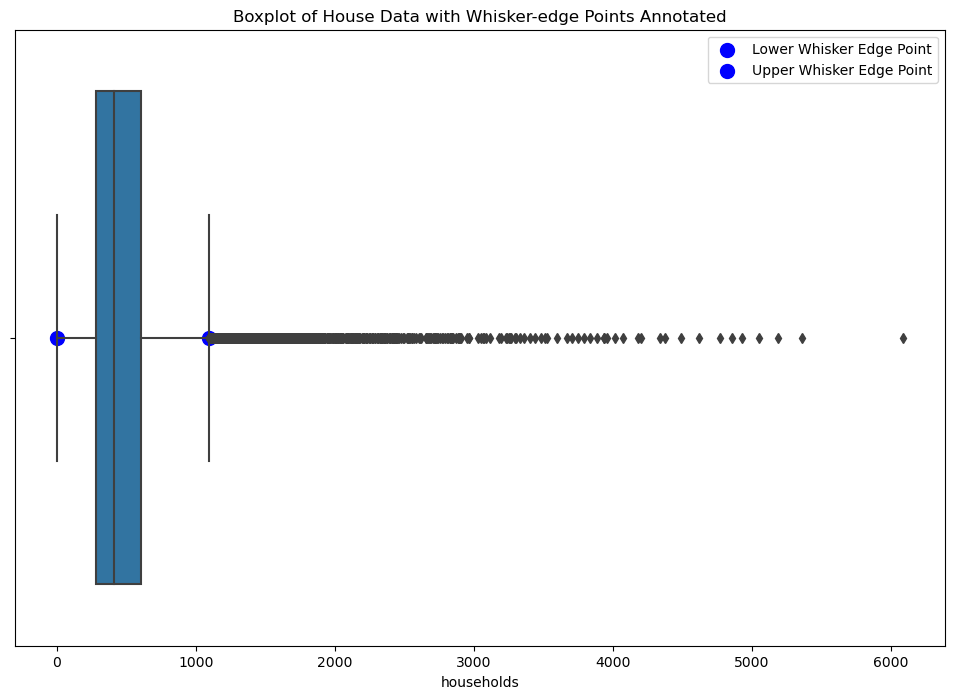

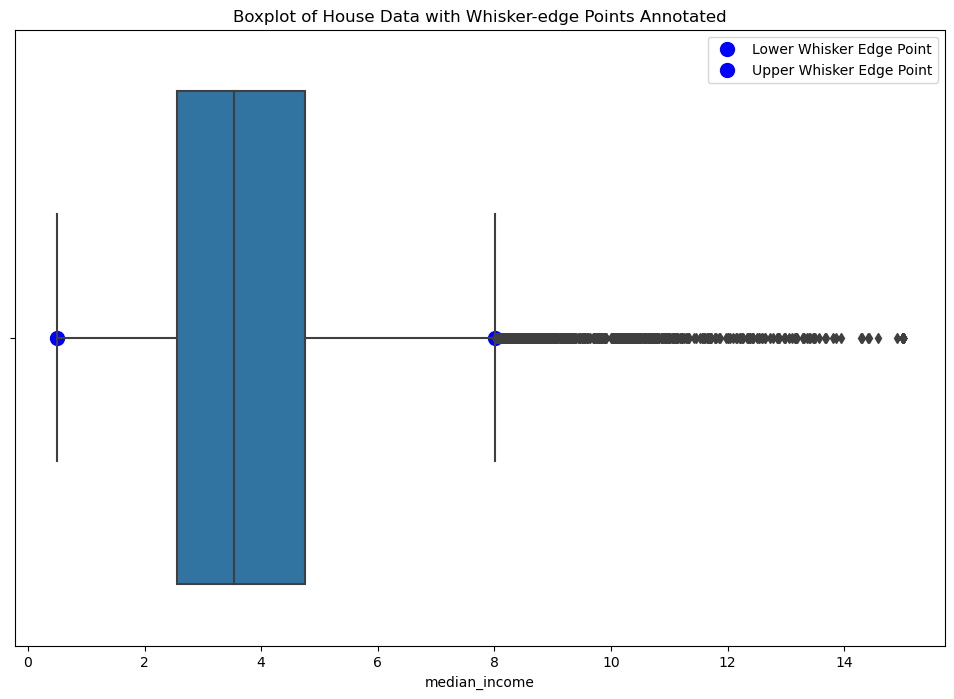

In [7]:
def outlier_detection(feature):
    Q1 = housing_df[feature].quantile(0.25)

    Q3 = housing_df[feature].quantile(0.75)

    IQR = Q3 - Q1

    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    

    plt.figure(figsize=(12, 8))
    boxplot = sns.boxplot(x=housing_df[feature], whis=1.5)


    whisker_edge_data = housing_df[(housing_df[feature] >= lower_whisker) & (housing_df[feature] <= upper_whisker)]
    

    lower_whisker_point = whisker_edge_data[feature].min()
    upper_whisker_point = whisker_edge_data[feature].max()

    plt.scatter([lower_whisker_point], [0], color='blue', s=100, label='Lower Whisker Edge Point')
    plt.scatter([upper_whisker_point], [0], color='blue', s=100, label='Upper Whisker Edge Point')
    plt.legend()

    plt.title('Boxplot of House Data with Whisker-edge Points Annotated')
    plt.xlabel(feature)
    plt.show()

    return lower_whisker,upper_whisker, housing_df[(housing_df[feature] < lower_whisker) | (housing_df[feature] > upper_whisker)]


lower_whisker_longitude,upper_whisker_longitude,outliers_of_longitude=outlier_detection('longitude')  

lower_whisker_latitude,upper_whisker_latitude,outliers_of_latitude=outlier_detection('latitude') 

lower_whisker_housing_median_age,upper_whisker_housing_median_age,outliers_of_housing_median_age=outlier_detection('housing_median_age') 

lower_whisker_total_rooms,upper_whisker_total_rooms,outliers_of_total_rooms=outlier_detection('total_rooms') 

lower_whisker_total_bedrooms,upper_whisker_total_bedrooms,outliers_of_total_bedrooms=outlier_detection('total_bedrooms')

lower_whisker_population,upper_whisker_population,outliers_of_population=outlier_detection('population') 

lower_whisker_households,upper_whisker_households,outliers_of_households=outlier_detection('households') 

lower_whisker_median_income,upper_whisker_median_income,outliers_of_median_income=outlier_detection('median_income') 





# Interquartile Range (IQR) Method:

- **Q1 (First Quartile):** This is the 25th percentile of the data. It separates the lowest 25% of the data.
- **Q3 (Third Quartile):** This is the 75th percentile of the data. It separates the lowest 75% of the data.

- **IQR (Interquartile Range):** The interquartile range is a measure of variability and is calculated by subtracting the first quartile (Q1) from the third quartile (Q3):
    - $\text{IQR} = Q3 - Q1$

### Outlier Boundaries:
-  **Lower Bound: Q1 - 1.5 X IQR**
-  **Upper Bound: Q1 + 1.5 X IQR**
- Any data point below the lower bound or above the upper bound is considered an outlier.

### Why 1.5 Times IQR?
- The factor of 1.5 is a common threshold, but it can be adjusted based on the level of stringency you want. A higher multiplier would make the method less sensitive to outliers.

### Detection and Removal
- Any data points falling outside the calculated bounds are identified as potential outliers.
- Outliers can be removed or flagged for further investigation.


### Why Choose the IQR Method:
#### 	Robustness:
-		IQR is robust against extreme values, as it is not influenced by the specific values of outliers.

####    Non-parametric:
-		It doesn't assume a specific distribution for the data, making it suitable for a wide range of datasets.

#### 	Simplicity:
-		The concept of quartiles and the IQR is easy to understand and interpret.

#### 	Widespread Use:
-		It's a widely accepted and used method, making it a good starting point for outlier detection.


## 1.3. Outlier Handling (15 Pts)
Try the following methods to handle outliers, creating checkpoints for each. Additionally, visualize the final data distribution after each method to identify any significant changes
1. Keep the dataset as is - take the original checkpoint for baseline comparison.
2. Outlier removal
3. Mean Imputation (Use Mode imputation for categorical variables)
4. Median Imputation (Use Mode imputation for categorical variables)

In [8]:
#Keep the dataset as is - take the original checkpoint for baseline comparison.

checkpoint(housing_df,'original')

Checkpoint 'original' created.


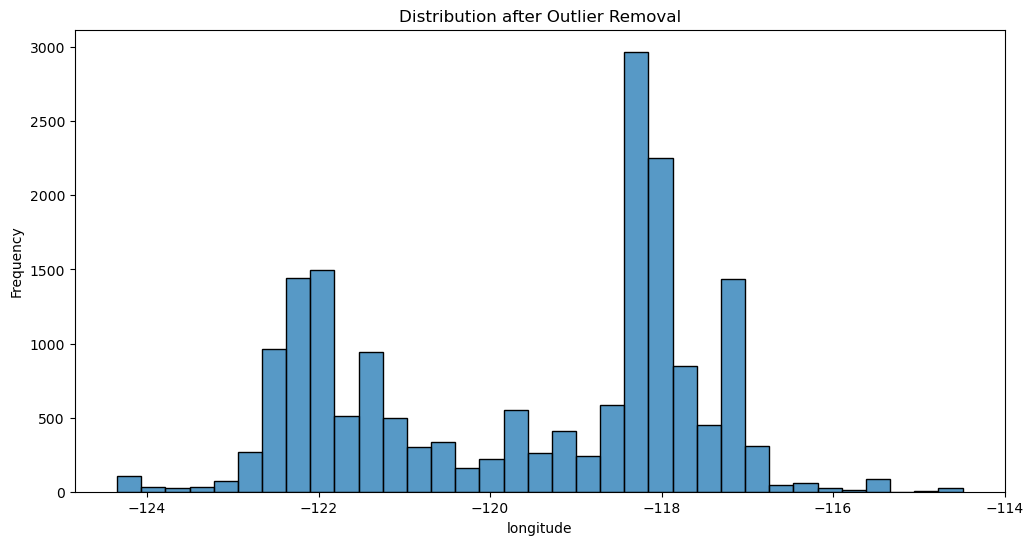

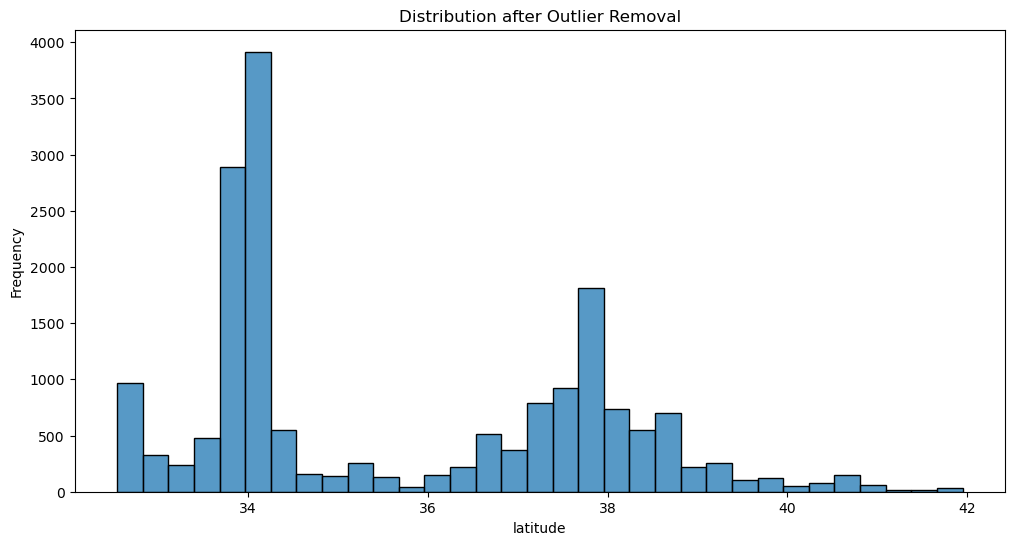

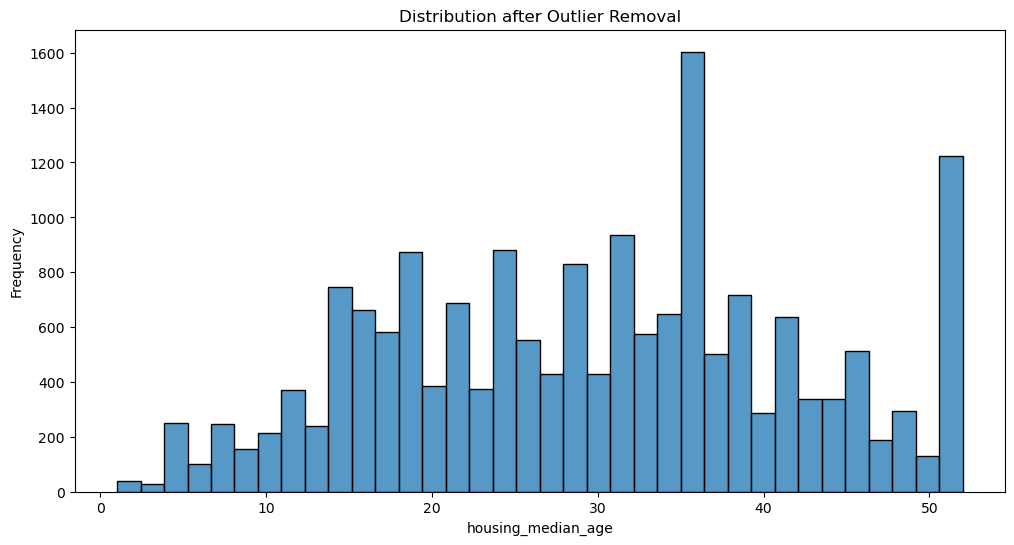

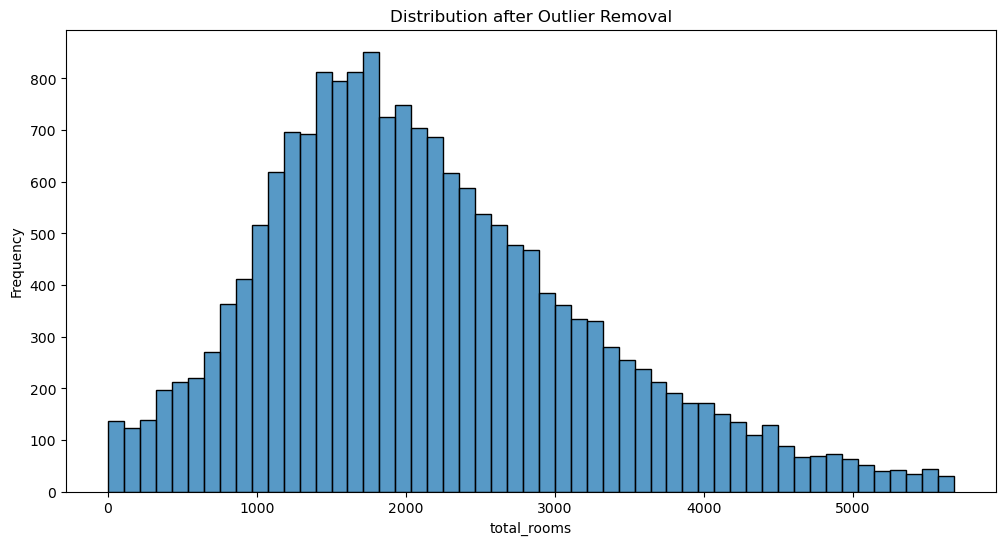

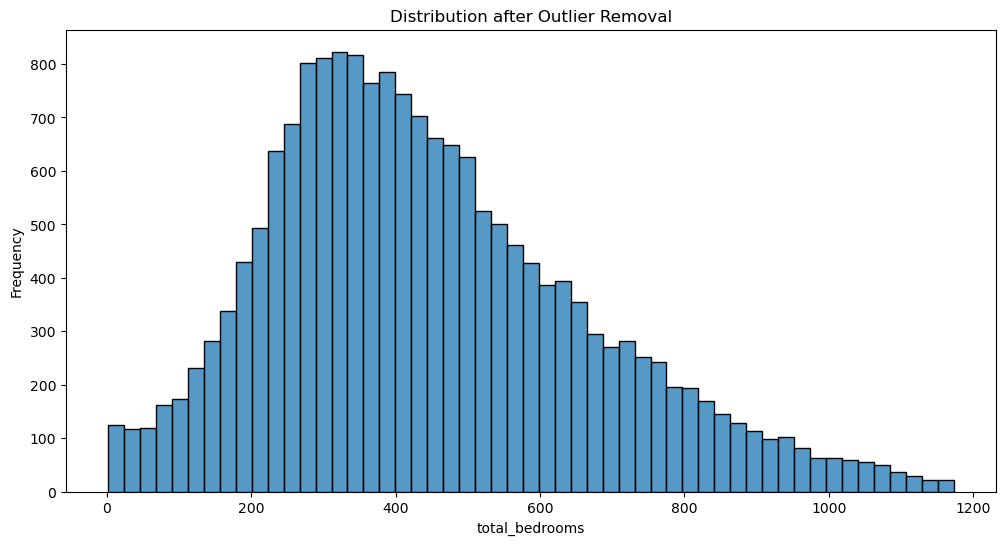

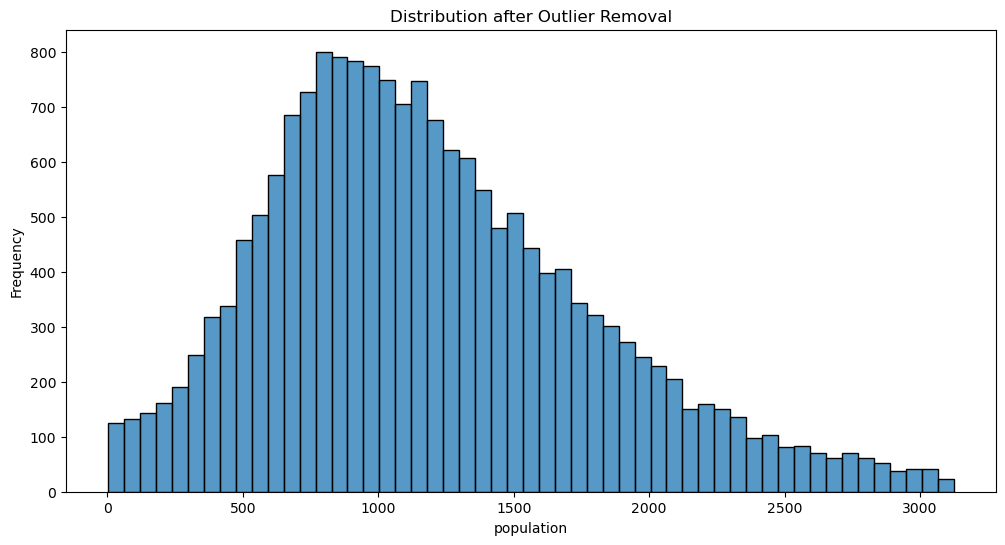

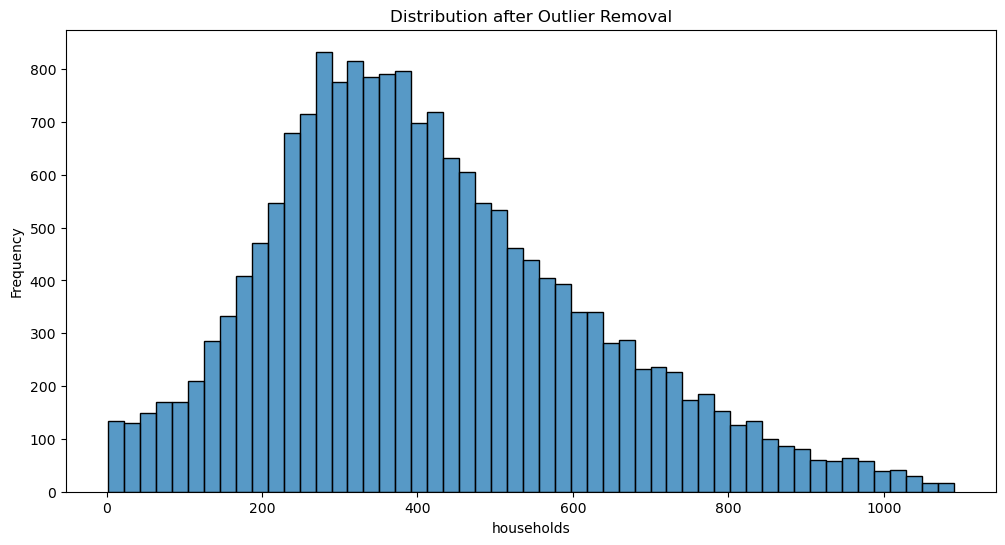

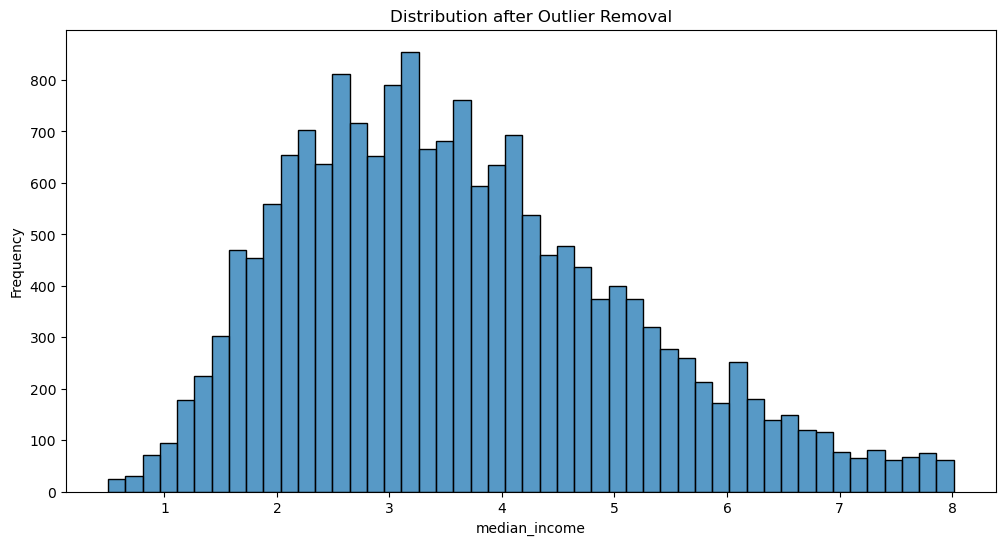

Checkpoint 'outlier_removed' created.


In [9]:
#Outlier removal
housing_no_outliers = housing_df.copy()

housing_no_outliers = housing_df[
    (housing_df['longitude'] >= lower_whisker_longitude) & (housing_df['longitude'] <= upper_whisker_longitude) &
    (housing_df['latitude'] >= lower_whisker_latitude) & (housing_df['latitude'] <= upper_whisker_latitude) &
    (housing_df['housing_median_age'] >= lower_whisker_housing_median_age) & (housing_df['housing_median_age'] <= upper_whisker_housing_median_age) &
    (housing_df['total_rooms'] >= lower_whisker_total_rooms) & (housing_df['total_rooms'] <= upper_whisker_total_rooms) &
    (housing_df['total_bedrooms'] >= lower_whisker_total_bedrooms) & (housing_df['total_bedrooms'] <= upper_whisker_total_bedrooms) &
    (housing_df['population'] >= lower_whisker_population) & (housing_df['population'] <= upper_whisker_population) &
    (housing_df['households'] >= lower_whisker_households) & (housing_df['households'] <= upper_whisker_households) &
    (housing_df['median_income'] >= lower_whisker_median_income) & (housing_df['median_income'] <= upper_whisker_median_income)
]


for feature in numeric_features:
    if feature=='median_house_value':
        continue
    plt.figure(figsize=(12, 6))
    sns.histplot(housing_no_outliers[feature])
    plt.title('Distribution after Outlier Removal')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()
checkpoint(housing_no_outliers, 'outlier_removed')



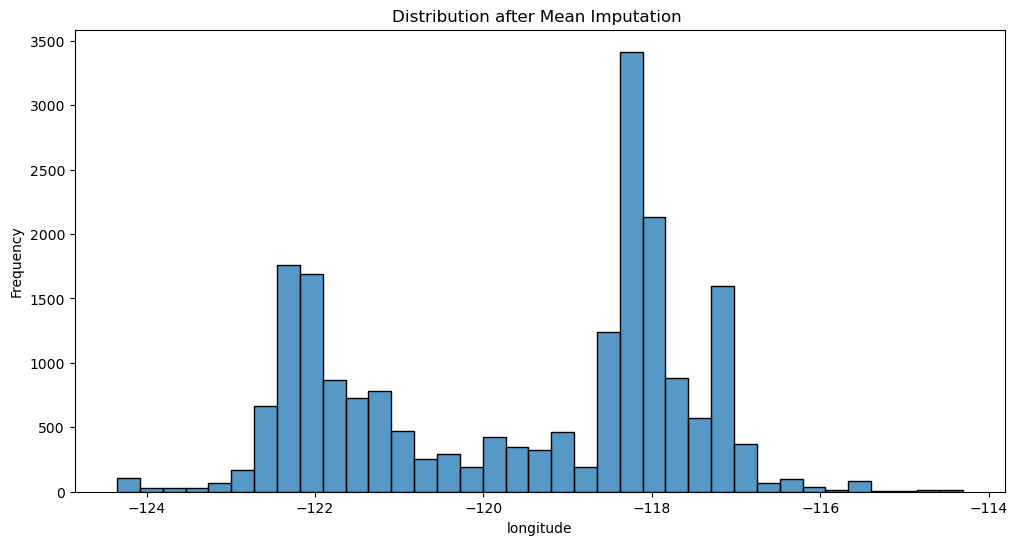

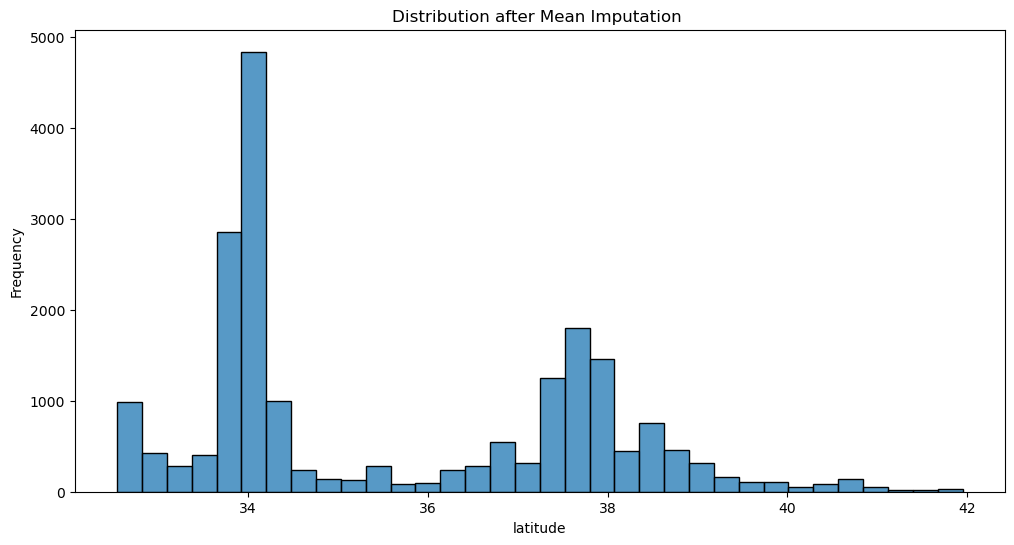

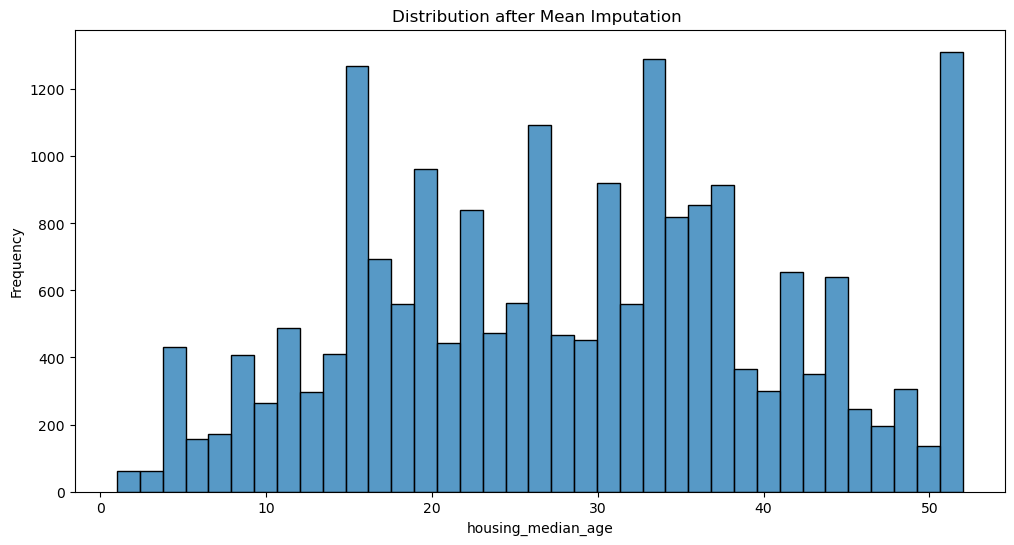

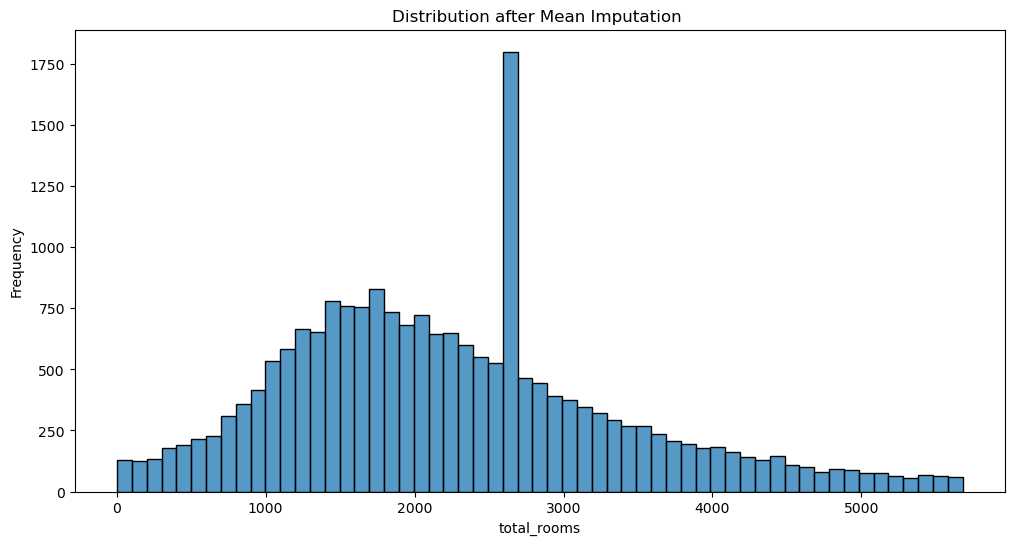

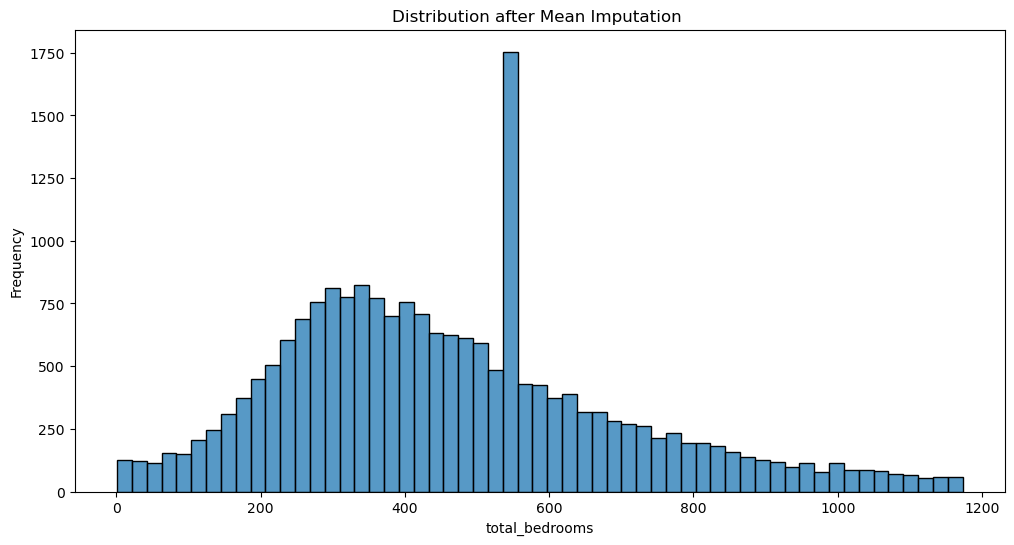

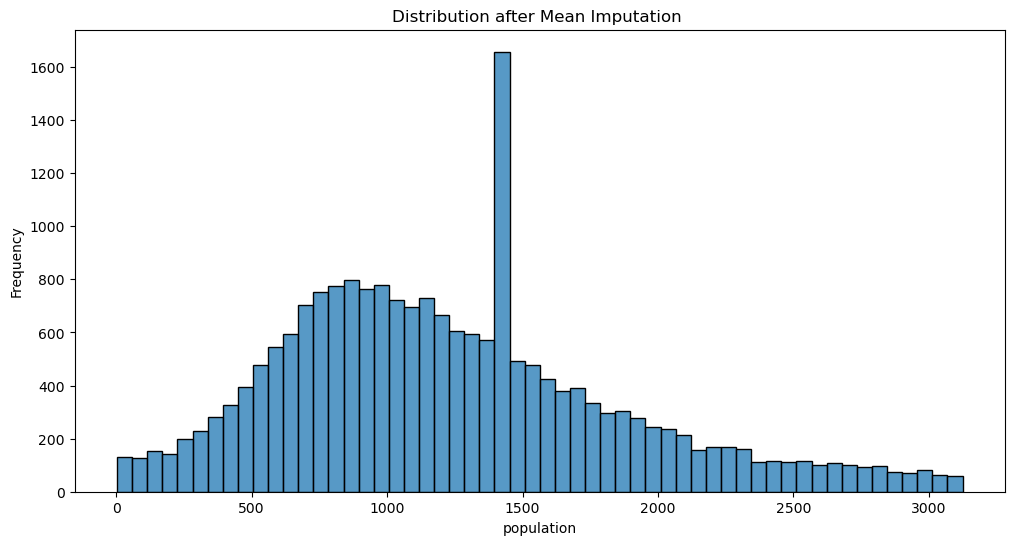

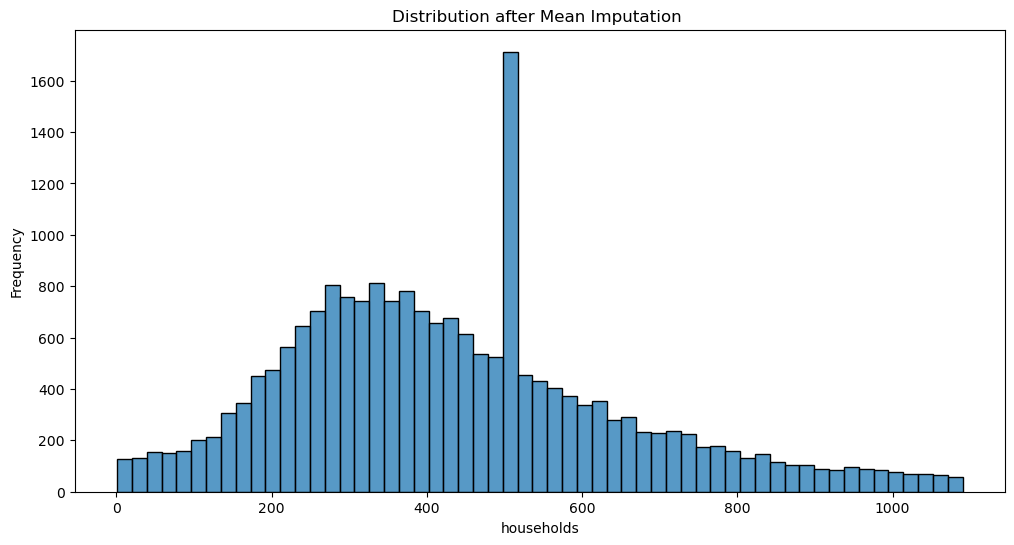

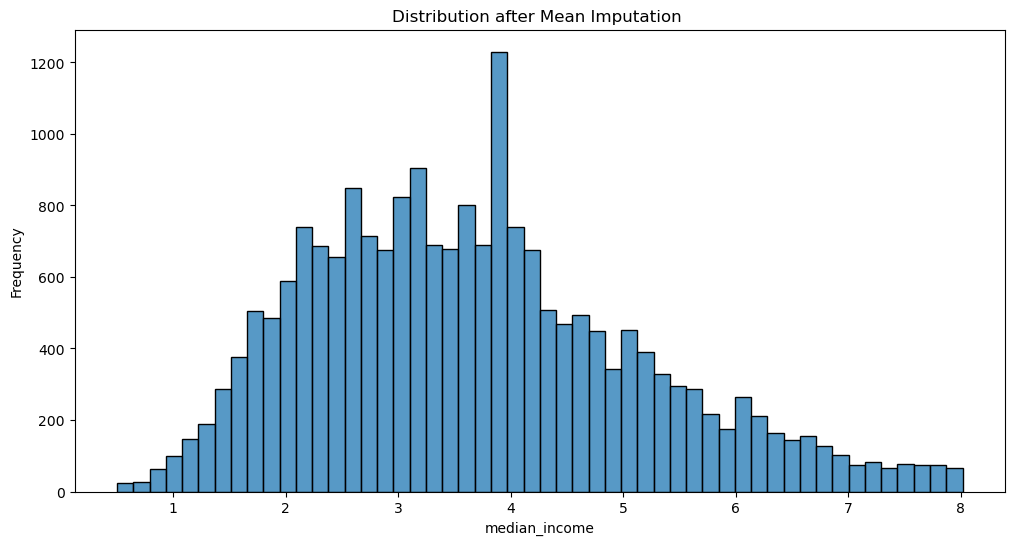

Checkpoint 'mean_imputed' created.


In [10]:
# Mean Imputation (Use Mode imputation for categorical variables)

housing_mean_imputed = housing_df.copy()


whisker_limits = {
    'longitude': {'lower': lower_whisker_longitude, 'upper': upper_whisker_longitude},
    'latitude': {'lower': lower_whisker_latitude, 'upper': upper_whisker_latitude},
    'housing_median_age': {'lower': lower_whisker_housing_median_age, 'upper': upper_whisker_housing_median_age},
    'total_rooms': {'lower': lower_whisker_total_rooms, 'upper': upper_whisker_total_rooms},
    'total_bedrooms': {'lower': lower_whisker_total_bedrooms, 'upper': upper_whisker_total_bedrooms},
    'population': {'lower': lower_whisker_population, 'upper': upper_whisker_population},
    'households': {'lower': lower_whisker_households, 'upper': upper_whisker_households},
    'median_income': {'lower': lower_whisker_median_income, 'upper': upper_whisker_median_income}
}


for feature, limits in whisker_limits.items():
    
    housing_mean_imputed.loc[housing_mean_imputed[feature] > limits['upper'], feature] = housing_mean_imputed[feature].mean()
    
    housing_mean_imputed.loc[housing_mean_imputed[feature] < limits['lower'], feature] = housing_mean_imputed[feature].mean()
    
    
for feature in numeric_features:
    if feature=='median_house_value':
        continue
    plt.figure(figsize=(12, 6))
    sns.histplot(housing_mean_imputed[feature])
    plt.title('Distribution after Mean Imputation ')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()    
    
checkpoint(housing_mean_imputed, 'mean_imputed')    


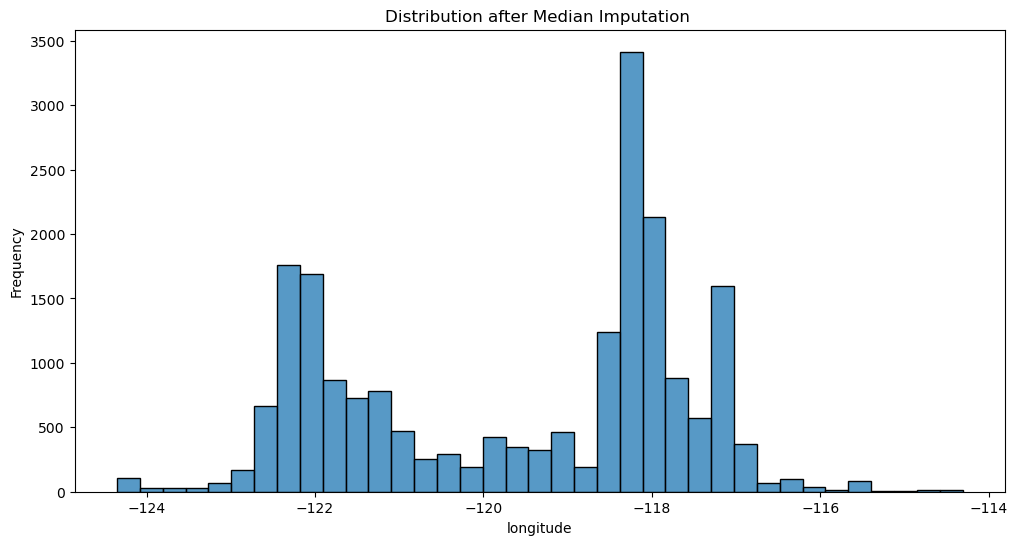

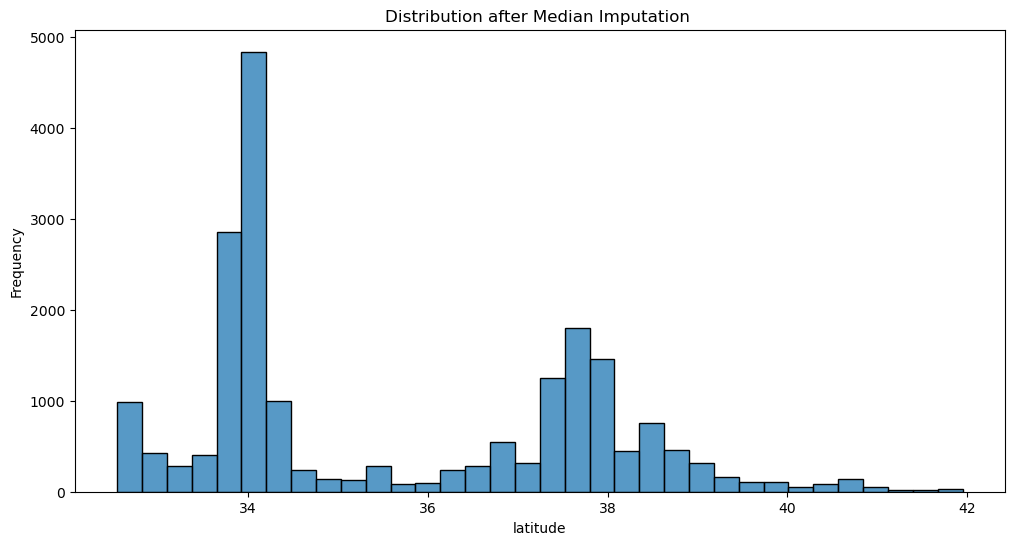

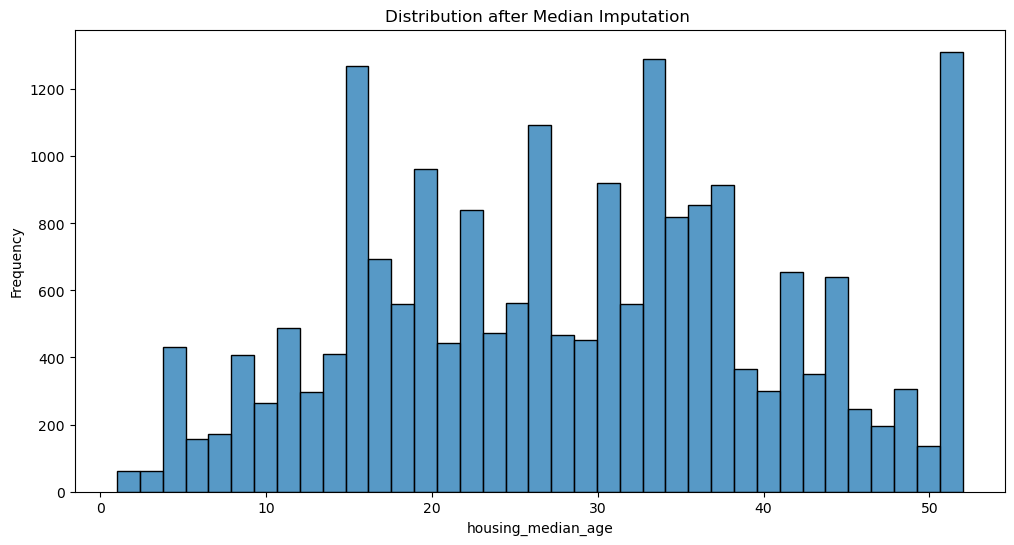

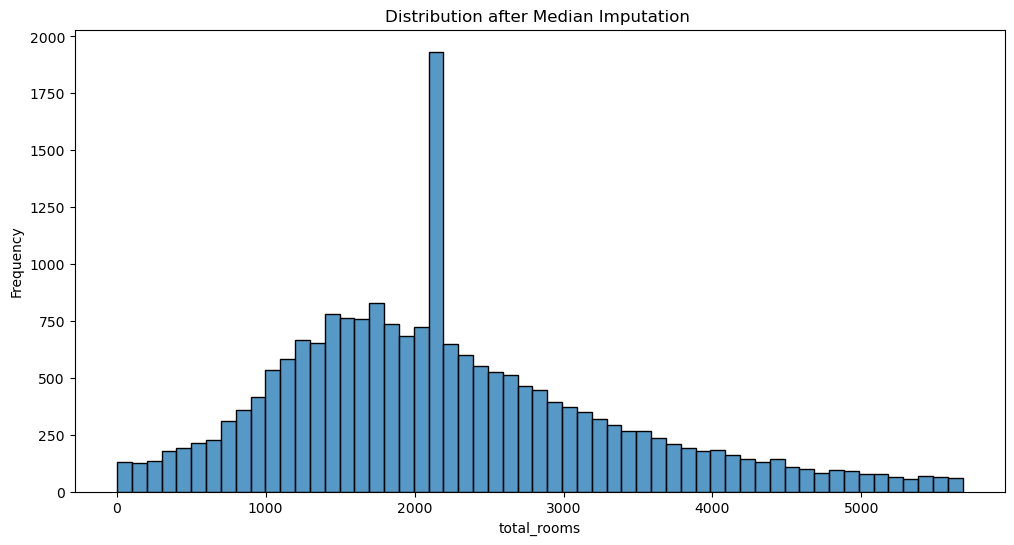

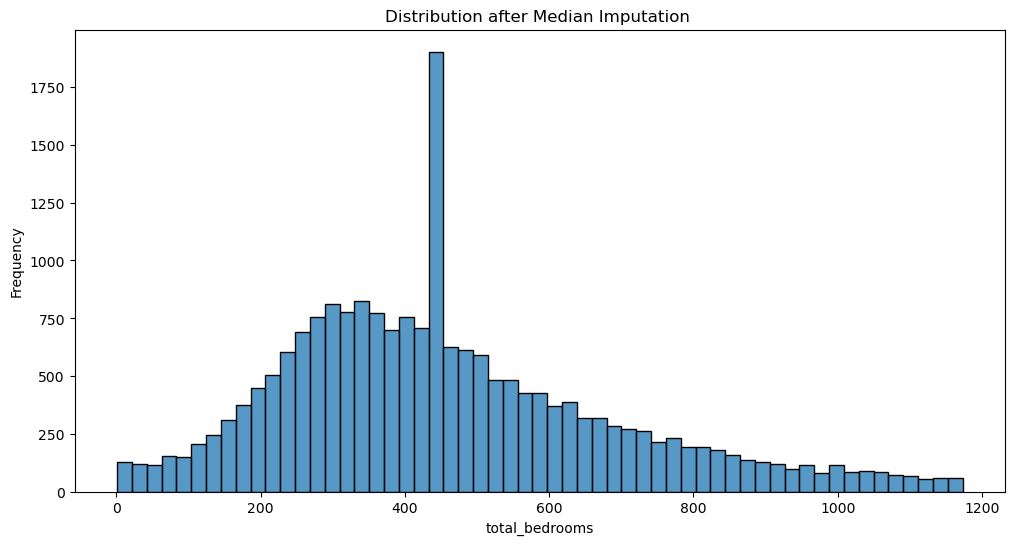

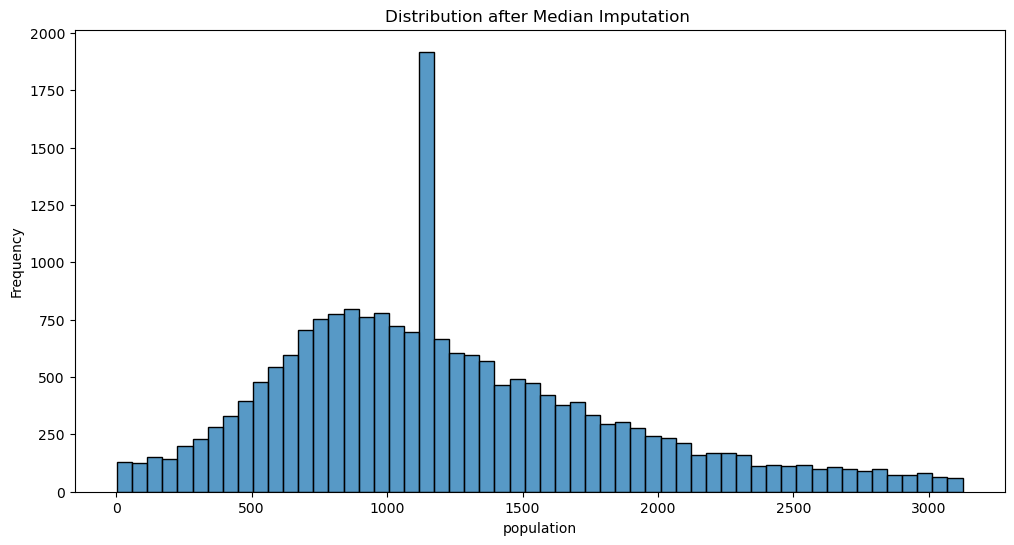

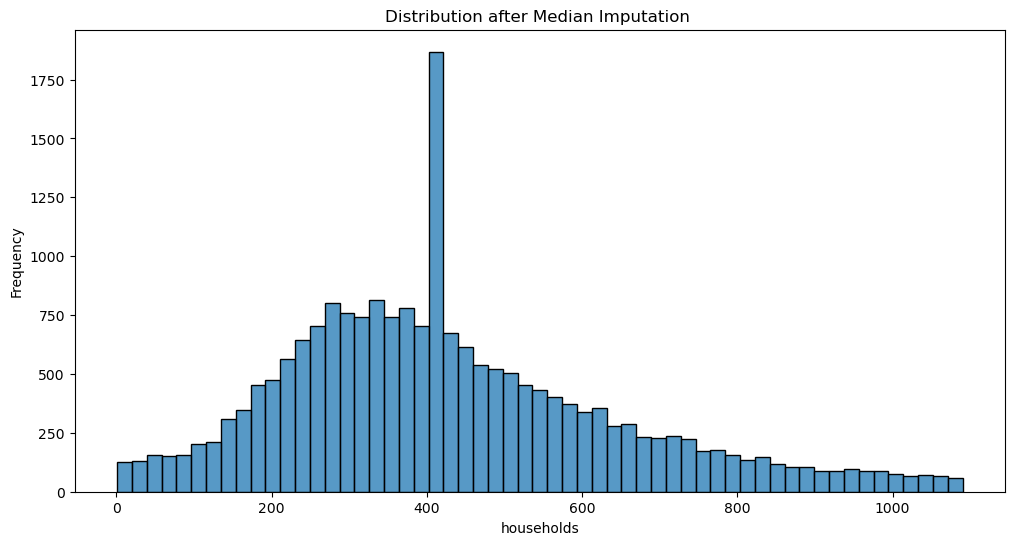

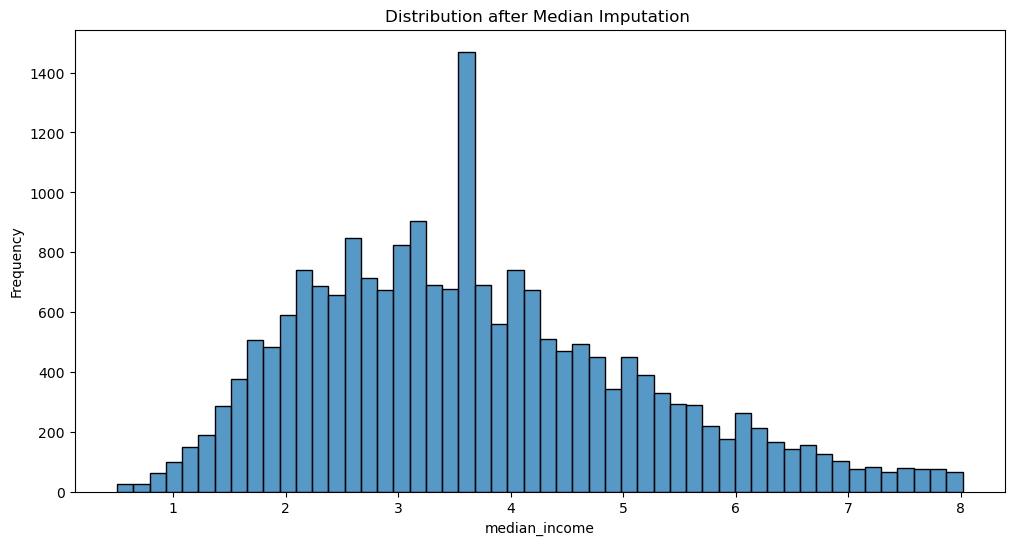

Checkpoint 'median_imputed' created.


In [11]:
# Median Imputation (Use Mode imputation for categorical variables)

housing_median_imputed = housing_df.copy()
for feature, limits in whisker_limits.items():
    
    housing_median_imputed.loc[housing_median_imputed[feature] > limits['upper'], feature] = housing_median_imputed[feature].median()
    
    
    housing_median_imputed.loc[housing_median_imputed[feature] < limits['lower'], feature] = housing_median_imputed[feature].median()
    
    
for feature in numeric_features:
    if feature=='median_house_value':
        continue
    plt.figure(figsize=(12, 6))
    sns.histplot(housing_median_imputed[feature])
    plt.title('Distribution after Median Imputation ')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()    
    
    
checkpoint(housing_median_imputed, 'median_imputed') 


## 1.4. Encode the Ordinal Features with Ordinal Encoding (2 Pts)

In [24]:
ordered_categories = [['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']]
encoder = OrdinalEncoder(categories=ordered_categories)



originalData = pd.read_csv('originalData.csv')
outlier_removed = pd.read_csv('outlier_removed.csv')
mean_imputed = pd.read_csv('mean_imputed.csv')
median_imputed = pd.read_csv('median_imputed.csv')

originalData['ocean_proximity_encoded'] = encoder.fit_transform(originalData[['ocean_proximity']])
outlier_removed['ocean_proximity_encoded'] = encoder.fit_transform(outlier_removed[['ocean_proximity']])
mean_imputed['ocean_proximity_encoded'] = encoder.fit_transform(mean_imputed[['ocean_proximity']])
median_imputed['ocean_proximity_encoded'] = encoder.fit_transform(median_imputed[['ocean_proximity']])




## 1.5. Manually shuffle the dataset and split it into training (70%) and testing (30%) sets. Write your own code for shuffling and splitting, avoiding the use of pre-defined functions like train_test_split." (8 Pts)

You  cannot use scikit-learn's shuffle.

In [32]:
def shuffle_and_split(data, split_ratio=0.7, random_seed=45):
    np.random.seed(random_seed)

    
    shuffled_indices = np.random.permutation(len(data))
    shuffled_data = data.iloc[shuffled_indices]

    train_size = int(len(shuffled_data) * split_ratio)
    train_set = shuffled_data[:train_size]
    test_set = shuffled_data[train_size:]
    return train_set, test_set


train_set, test_set = shuffle_and_split(housing_df)



print("Training Set:")
display(train_set.head())

print("\nTesting Set:")
display(test_set.head())


Training Set:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
9249,-120.08,36.97,13.0,3356.0,589.0,1458.0,601.0,3.8257,94200.0,INLAND,1.0
2464,-119.79,36.55,32.0,1393.0,276.0,999.0,245.0,2.0216,76800.0,INLAND,1.0
17013,-122.28,37.53,25.0,3710.0,1015.0,2068.0,958.0,3.5445,286700.0,NEAR OCEAN,4.0
14269,-117.12,32.69,46.0,200.0,77.0,180.0,65.0,1.0658,93800.0,NEAR OCEAN,4.0
8569,-118.43,33.90,27.0,1536.0,377.0,553.0,326.0,5.4088,500001.0,<1H OCEAN,0.0



Testing Set:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ocean_proximity_encoded
12042,-117.48,33.91,22.0,3611.0,666.0,1869.0,649.0,4.2207,141100.0,INLAND,1.0
17432,-120.45,34.65,21.0,1182.0,243.0,733.0,251.0,3.1442,131600.0,NEAR OCEAN,4.0
14512,-117.16,32.91,5.0,1619.0,272.0,1063.0,296.0,6.0891,214600.0,<1H OCEAN,0.0
7618,-118.23,33.84,25.0,1106.0,207.0,888.0,216.0,5.3307,207000.0,<1H OCEAN,0.0
3751,-118.38,34.18,24.0,1983.0,651.0,2251.0,574.0,2.4792,200000.0,<1H OCEAN,0.0


# 2. REGRESSION (50 Pts)
* Target value: median_house_value
* Predictors: The rest

## 2.1. kNN Regression (20 Pts)
* For each version of the dataset (original, outlier-removed, mean-imputed, median-imputed), execute the following steps:"
    * Split the data into train and test sets
    * Create an instance of kNN with a number of neighbors between 1-30, then fit kNN regression model to train data. Predict the test set and calculate the MSE value for each k. Plot the MSE vs k curve to decide on the optimal k. Additionally, report the R-squared value for the optimal k.
* Compare the MSE values for each dataset and comment on the results. Which dataset gives the best result? Why do you think that is?

You can use scikit-learn's KNeighborsRegressor.

Results for Original Dataset:
--------------------------------------------------


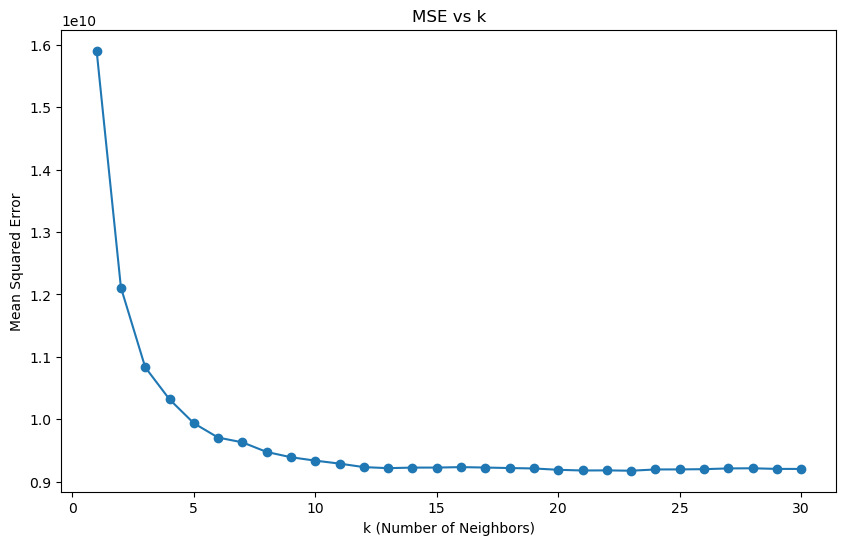

Optimal k: 23
R-squared for optimal k: 0.317336956255139


Results for No Outliers Dataset:
--------------------------------------------------


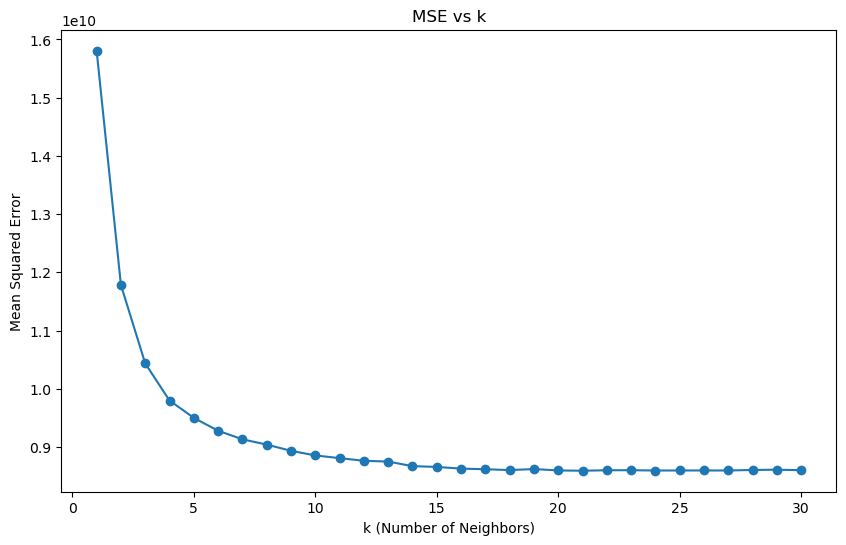

Optimal k: 21
R-squared for optimal k: 0.22886244901043284


Results for Mean Imputed Dataset:
--------------------------------------------------


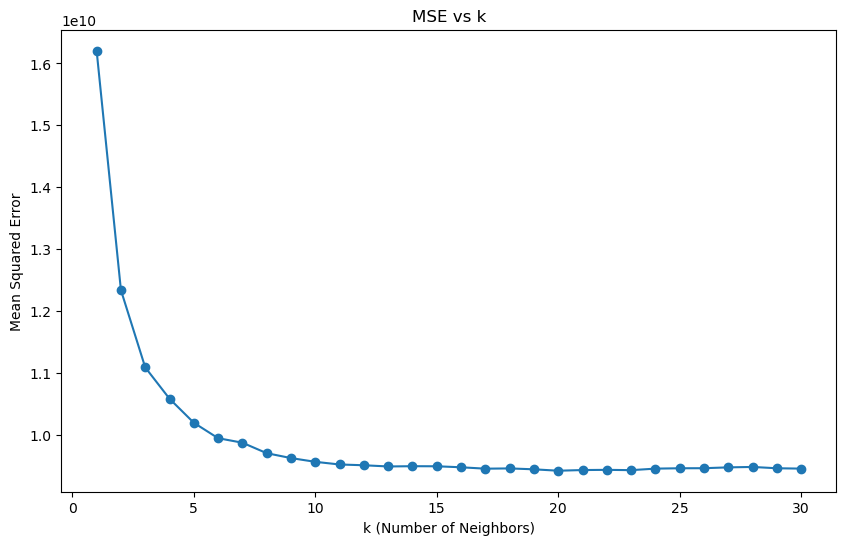

Optimal k: 20
R-squared for optimal k: 0.2992675151162424


Results for Median Imputed Dataset:
--------------------------------------------------


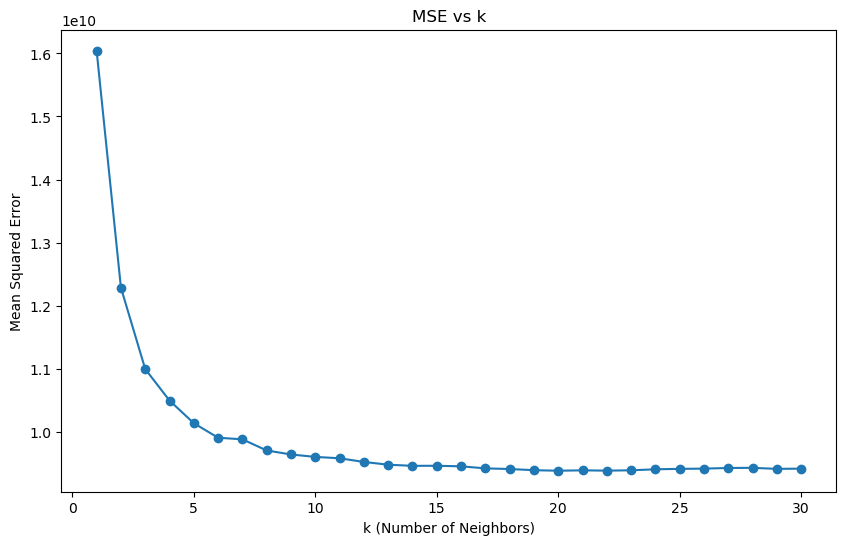

Optimal k: 20
R-squared for optimal k: 0.30181394032391096




In [33]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

def split_data_and_fit_knn(data, target_column, predictors, k_values):
   
 
    
    
    train_set, test_set = shuffle_and_split(data)
    X_train, y_train = train_set[predictors], train_set[target_column]
    X_test, y_test = test_set[predictors], test_set[target_column]
    
    mse_values = []
    r2_values = []

    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        
        y_pred = knn.predict(X_test)
        
       
        mse = mean_squared_error(y_test, y_pred)
        mse_values.append(mse)
        

        
        r2 = r2_score(y_test, y_pred)
        r2_values.append(r2)

   
    optimal_k = k_values[np.argmin(mse_values)]
    
   
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, mse_values, marker='o')
    plt.title('MSE vs k')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Mean Squared Error')
    plt.show()

   
    print(f'Optimal k: {optimal_k}')
    print(f'R-squared for optimal k: {r2_values[k_values.index(optimal_k)]}')


k_values = list(range(1, 31))


def print_results(data, dataset_name, target_column, predictors, k_values):
    print(f"Results for {dataset_name} Dataset:")
    print("-" * 50)
    split_data_and_fit_knn(data, target_column, predictors, k_values)
    print("\n" + "=" * 50 + "\n")


print_results(originalData, 'Original', 'median_house_value', ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity_encoded'], k_values)

print_results(outlier_removed, 'No Outliers', 'median_house_value', ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity_encoded'], k_values)

print_results(mean_imputed, 'Mean Imputed', 'median_house_value', ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity_encoded'], k_values)

print_results(median_imputed, 'Median Imputed', 'median_house_value', ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity_encoded'], k_values)


- **The dataset where outliers are removed has a lower MSE compared to the other imputed datasets. This suggests that the model performs better by reducing the noise caused by outliers in the dataset. Outliers often provide misleading information to statistical models, negatively impacting their performance. Removing outliers helps the model fit better to the true data distribution, leading to lower MSE values.**

## 2.2. Linear Regression (20 Pts)
* For each version of the dataset (original, outlier removal, mean imputation, median imputation), do the following:
    * Split the data into train and test sets
    * Fit a linear regression model to train data. Predict the test set and calculate the MSE value.

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def fit_linear_regression(data, target_column, predictors):
    
    train_set, test_set = shuffle_and_split(data)
    X_train, y_train = train_set[predictors], train_set[target_column]
    X_test, y_test = test_set[predictors], test_set[target_column]
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    
  
    y_pred = lin_reg.predict(X_test)
    
  
    mse = mean_squared_error(y_test, y_pred)
    
    return mse


predictors = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','ocean_proximity_encoded']


mse_original = fit_linear_regression(originalData, 'median_house_value', predictors)
mse_outlier_removal = fit_linear_regression(outlier_removed, 'median_house_value', predictors)
mse_mean_imputation = fit_linear_regression(mean_imputed, 'median_house_value', predictors)
mse_median_imputation = fit_linear_regression(median_imputed, 'median_house_value', predictors)


print("MSE for Original Dataset:", mse_original)
print("MSE for Outlier Removal Dataset:", mse_outlier_removal)
print("MSE for Mean Imputation Dataset:", mse_mean_imputation)
print("MSE for Median Imputation Dataset:", mse_median_imputation)


MSE for Original Dataset: 4993664555.787435
MSE for Outlier Removal Dataset: 4361441228.37262
MSE for Mean Imputation Dataset: 6798779853.479653
MSE for Median Imputation Dataset: 7049175914.872525


## 2.3. Compare the Regression Methods (10 Pts)

Compare and contrast the performance of kNN and Linear Regression models across the different dataset versions (those attained in 1.3.). Discuss the strengths and limitations of each model based on your results

\< double click and insert answer here \>
- **The nature of the dataset influences the choice of the model. Linear regression is generally more effective when there is a linear relationship between dependent and independent variables. On the other hand, k-NN regression tends to be more successful in situations where the dataset exhibits non-linear and more complex relationships. In this dataset, as there is typically a linear relationship between the dependent and independent variables, linear regression performs better.**

- **Both kNN Regression and Linear Regression gave the best performance in the Outlier Removal Data Set. The reason for this is that the values in our current data contain many outliers. When we impute these outliers according to the median and mean, our data changes a lot, but we get the best results when we remove them directly instead of imputing them.**


# PLAGIARISM POLICY

In the interest of maintaining a fair and honest academic environment, this course strictly adheres to a zero-tolerance policy regarding plagiarism. 
Accordingly, all assignments must reflect individual effort and understanding. While abstract discussions with peers about concepts are encouraged, sharing or copying specific solutions, code, or pseudocode is not permitted and will be treated as plagiarism. This policy includes work sourced from the internet, publications, and AI tools like ChatGPT and GitHub Copilot. **MAKE USE OF THEM RESPONSIBLY**. That is, you can utilize them to enhance understanding and support your original work, **not to replace it**. Submitting work that is not entirely your own creation will be regarded as a violation of academic integrity. It is vital to use all resources, including AI, in a manner that supports your educational development without compromising the principles of academic honesty. 

If in doubt, do not hesitate to seek guidance from the course staff - we are here to help, with an aim to foster a learning environment based on trust, respect, and responsibility.

# REFERENCES
[1] Nugent, C. (n.d.). California Housing Prices [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/camnugent/california-housing-prices